# This is an example of absolute shear-wave velocities conversion to temperature using different methods 

## Introduction
### NEED TO WRITE: motivation and expectations

# Importing requirements

In [205]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from scipy import interpolate
import math



In [206]:
# These are just cosmetics
plt.style.use('seaborn-white')
#plt.style.use('ggplot')
plt.rc('font', size=16) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=16) #fontsize of the x and y labels
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.rc('legend', fontsize=14) #fontsize of the legend

In [207]:
LitMod_ref = np.loadtxt('./databases/LitMod2D_2.0_Ref_Model_for_Syn_tomo.dat',skiprows=1)
pressure_litmod = interpolate.interp1d(LitMod_ref[:,0],LitMod_ref[:,5]/100000)
# pressure in the LitMod ref is in pascal so converting it above to bar becaouse
# look-up table e.g. 99 have pressure in bar
#cehck with ak135
ak135 = np.loadtxt('./databases/ak135f.txt',skiprows=1)
ak135_P = 9.8*ak135[:,0]*1e3*ak135[:,1]*1e3*1e-5
pressure_ak135  = interpolate.interp1d(ak135[:,0],ak135_P)
pressure_litmod = interpolate.interp1d(LitMod_ref[:,0],LitMod_ref[:,5]/100000)
vs_ak135_func = interpolate.interp1d(ak135[:,0],ak135[:,3])

In [211]:
### lithostatic pressure from ak135
def P_ak135(depth):
    DepthCalculated = False
    i = 0
    Pressure = 0.
    depth = np.absolute(depth)
    while DepthCalculated is False:
        if i > len(ak135):
            print('Limit of AK135 model exceeded. End loop.')
            break
        z1   = ak135[i,0]*1000.
        Rho1 = ak135[i,1]*1000.
        z2   = ak135[i+1,0]*1000.
        Rho2 = ak135[i+1,1]*1000.
        if depth < ak135[i+1,0]*1000.:
            Rho2 = Rho1 + (depth - z1)/(z2 - z1)*(Rho2 - Rho1)
            dz = depth - z1
            DepthCalculated = True
        else:
            dz = z2 - z1
            Pressure = Pressure + dz*(Rho1 + (Rho2 - Rho1)/2)*9.8
            i += 1
    return Pressurea
P = np.zeros_like(ak135[:,0])
for i in range(len(ak135)-1):
    P[i] = P_ak135(ak135[i,0]*1000)*1e-5

pressure_ak135_lith = interpolate.interp1d(ak135[0:len(P),0],P)

In [ ]:
### lithostatic pressure from ak135
def P_ak135(depth,density):
        DepthCalculated = False
        i = 0
        Pressure = 0.
        depth = np.absolute(depth)
        while DepthCalculated is False:
            if i > len(ak135):
                print('Limit of AK135 model exceeded. End loop.')
                break
            z1   = ak135[i,0]*1000.
            Rho1 = ak135[i,1]*1000.
            z2   = ak135[i+1,0]*1000.
            Rho2 = ak135[i+1,1]*1000.
            if depth < ak135[i+1,0]*1000.:
                Rho2 = Rho1 + (depth - z1)/(z2 - z1)*(Rho2 - Rho1)
                dz = depth - z1
                DepthCalculated = True
            else:
                dz = z2 - z1
                Pressure = Pressure + dz*(Rho1 + (Rho2 - Rho1)/2)*9.8
                i += 1
        
    return Pressurea
P = np.zeros_like(ak135[:,0])
for i in range(len(ak135)-1):
    P[i] = P_ak135(ak135[i,0]*1000)*1e-5

pressure_ak135_lith = interpolate.interp1d(ak135[0:len(P),0],P)

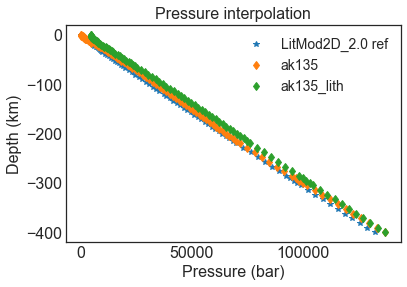

In [212]:
plt.plot(pressure_litmod(LitMod_ref[:,0]),-LitMod_ref[:,0],'*',label='LitMod2D_2.0 ref')
plt.plot(pressure_ak135(LitMod_ref[:,0]),-LitMod_ref[:,0],'d',label='ak135')
plt.plot(pressure_ak135_lith(LitMod_ref[:,0]),-LitMod_ref[:,0],'d',label='ak135_lith')

#plt.plot(ak135_P[0:19]/100000,-ak135[0:19,0],'o',label='ak135')
plt.xlabel('Pressure (Pascal)')
plt.ylabel('Depth (km)')
plt.legend(loc='lower left')
#ax_diff=plt.twiny()
#ax_diff.plot(LitMod_ref[:,5]/100000 - pressure_ak135(LitMod_ref[:,0])/100000 ,'c',label='difference')
#ax_diff.set_xlabel('Difference')
plt.legend(loc='upper right')
plt.xlabel('Pressure (bar)')
plt.ylabel('Depth (km)')
plt.title('Pressure interpolation')
plt.savefig("pressure.png", dpi=500)

## Data

In order to have a fixed data (i.e. tomography model), we take CSEM North Antlantic model (https://cos.ethz.ch/research/CSEM.html). We stack the velocities as a function of ocean-floor age. The advantage of doing this is that we can analystical calculate thermal structure of the oceanic lithosphere based on plate or half-space cooling model and compare the converted temperatures direcly. This also allows us to, in future, extract additional datasets (e.g., gravity, heat-flow etc) to further constrain and test the conversion methods.

In [6]:
###############
# data format
# age(Ma) depth(km) Vs(km/s)
# 
tomo_NA_stack = np.loadtxt('./data_tomo/NA_age_vel_stack.dat',comments='#')

In [191]:
# Just formating the data required
tomo_NA_stack = np.loadtxt('./data_tomo/Test_parallel.dat',comments='#')
print(len(tomo_NA_stack))
data=tomo_NA_stack[:,0];
data=np.column_stack((data,tomo_NA_stack[:,0]))
data=np.column_stack((data,tomo_NA_stack[:,1]))
data=np.column_stack((data,tomo_NA_stack[:,2]))
np.savetxt('3D_test.txt',data)

3120


In [198]:
data=np.loadtxt('./data_tomo/SL2013_k_mean_input_abs_Vs.txt',comments='#')
X = np.unique(data[:,0])
Y = np.unique(data[:,1])
Z = np.unique(data[:,2])
nx,ny,nz = np.meshgrid(X,Y,Z)
V= np.zeros_like(nz)

In [201]:
Z

array([ 25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250., 275.,
       300., 325., 350., 375., 400., 425., 450., 475., 500., 525., 550.,
       575., 600., 625., 650., 675., 700.])

In [202]:
ind = np.where( (data[:,0] == X[0]) & (data[:,1] == Y[0]) & (data[:,2] == Z[0]))
for item in ind:
    ind_=item[:]
    print(item)
index=ind_
print(str(index))
print(data[index,3])

[348579]
[348579]
[3.84241009]


In [196]:
np.min(nz)

5.0

In [203]:
for i in range(m):
    for j in range(n):
        for k in range(p):
            ind = np.where( (data[:,0] == nx[i][j][k]) & (data[:,1] == ny[i][j][k]) & (data[:,2] == nz[i][j][k]))
            #print(nx[i][j][k],ny[i][j][k],nz[i][j][k])
            try:
                V[i][j][k] = data[ind[0],3]
            except:
                print(ind)

IndexError: index 28 is out of bounds for axis 0 with size 28

In [190]:
print(V[0][30][1])
print(nx[0][30][1])
print(ny[0][30][1])
print(nz[0][30][1])


0.0
150.0
0.0
10.0


In [72]:
ind[0][:]

array([3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052,
       3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063,
       3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074,
       3075, 3076, 3077, 3078, 3079, 3080], dtype=int64)

RuntimeError: Error in qhull Delaunay triangulation calculation: singular input data (exitcode=2); use python verbose option (-v) to see original qhull error.

In [63]:
ind = np.argwhere( (data[:,0] == X[0]) & (data[:,1] == Y[0]))
print(np.shape(ind))

(80, 1)


In [28]:
A = np.zeros((len(X),len(Y),len(Z)))

In [43]:
for i in range(len(X)):
    for j in range(len(Y)):
        for k in range(len(Z)):
            A[i][j][k]=
            

0 0 0
0 0 1
0 0 2
0 0 3
0 0 4
0 0 5
0 0 6
0 0 7
0 0 8
0 0 9
0 0 10
0 0 11
0 0 12
0 0 13
0 0 14
0 0 15
0 0 16
0 0 17
0 0 18
0 0 19
0 0 20
0 0 21
0 0 22
0 0 23
0 0 24
0 0 25
0 0 26
0 0 27
0 0 28
0 0 29
0 0 30
0 0 31
0 0 32
0 0 33
0 0 34
0 0 35
0 0 36
0 0 37
0 0 38
0 0 39
0 0 40
0 0 41
0 0 42
0 0 43
0 0 44
0 0 45
0 0 46
0 0 47
0 0 48
0 0 49
0 0 50
0 0 51
0 0 52
0 0 53
0 0 54
0 0 55
0 0 56
0 0 57
0 0 58
0 0 59
0 0 60
0 0 61
0 0 62
0 0 63
0 0 64
0 0 65
0 0 66
0 0 67
0 0 68
0 0 69
0 0 70
0 0 71
0 0 72
0 0 73
0 0 74
0 0 75
0 0 76
0 0 77
0 0 78
0 0 79
0 1 0
0 1 1
0 1 2
0 1 3
0 1 4
0 1 5
0 1 6
0 1 7
0 1 8
0 1 9
0 1 10
0 1 11
0 1 12
0 1 13
0 1 14
0 1 15
0 1 16
0 1 17
0 1 18
0 1 19
0 1 20
0 1 21
0 1 22
0 1 23
0 1 24
0 1 25
0 1 26
0 1 27
0 1 28
0 1 29
0 1 30
0 1 31
0 1 32
0 1 33
0 1 34
0 1 35
0 1 36
0 1 37
0 1 38
0 1 39
0 1 40
0 1 41
0 1 42
0 1 43
0 1 44
0 1 45
0 1 46
0 1 47
0 1 48
0 1 49
0 1 50
0 1 51
0 1 52
0 1 53
0 1 54
0 1 55
0 1 56
0 1 57
0 1 58
0 1 59
0 1 60
0 1 61
0 1 62
0 1 63
0 1 64
0 1 6

0 27 37
0 27 38
0 27 39
0 27 40
0 27 41
0 27 42
0 27 43
0 27 44
0 27 45
0 27 46
0 27 47
0 27 48
0 27 49
0 27 50
0 27 51
0 27 52
0 27 53
0 27 54
0 27 55
0 27 56
0 27 57
0 27 58
0 27 59
0 27 60
0 27 61
0 27 62
0 27 63
0 27 64
0 27 65
0 27 66
0 27 67
0 27 68
0 27 69
0 27 70
0 27 71
0 27 72
0 27 73
0 27 74
0 27 75
0 27 76
0 27 77
0 27 78
0 27 79
0 28 0
0 28 1
0 28 2
0 28 3
0 28 4
0 28 5
0 28 6
0 28 7
0 28 8
0 28 9
0 28 10
0 28 11
0 28 12
0 28 13
0 28 14
0 28 15
0 28 16
0 28 17
0 28 18
0 28 19
0 28 20
0 28 21
0 28 22
0 28 23
0 28 24
0 28 25
0 28 26
0 28 27
0 28 28
0 28 29
0 28 30
0 28 31
0 28 32
0 28 33
0 28 34
0 28 35
0 28 36
0 28 37
0 28 38
0 28 39
0 28 40
0 28 41
0 28 42
0 28 43
0 28 44
0 28 45
0 28 46
0 28 47
0 28 48
0 28 49
0 28 50
0 28 51
0 28 52
0 28 53
0 28 54
0 28 55
0 28 56
0 28 57
0 28 58
0 28 59
0 28 60
0 28 61
0 28 62
0 28 63
0 28 64
0 28 65
0 28 66
0 28 67
0 28 68
0 28 69
0 28 70
0 28 71
0 28 72
0 28 73
0 28 74
0 28 75
0 28 76
0 28 77
0 28 78
0 28 79
0 29 0
0 29 1
0 29 2
0 29 

1 3 3
1 3 4
1 3 5
1 3 6
1 3 7
1 3 8
1 3 9
1 3 10
1 3 11
1 3 12
1 3 13
1 3 14
1 3 15
1 3 16
1 3 17
1 3 18
1 3 19
1 3 20
1 3 21
1 3 22
1 3 23
1 3 24
1 3 25
1 3 26
1 3 27
1 3 28
1 3 29
1 3 30
1 3 31
1 3 32
1 3 33
1 3 34
1 3 35
1 3 36
1 3 37
1 3 38
1 3 39
1 3 40
1 3 41
1 3 42
1 3 43
1 3 44
1 3 45
1 3 46
1 3 47
1 3 48
1 3 49
1 3 50
1 3 51
1 3 52
1 3 53
1 3 54
1 3 55
1 3 56
1 3 57
1 3 58
1 3 59
1 3 60
1 3 61
1 3 62
1 3 63
1 3 64
1 3 65
1 3 66
1 3 67
1 3 68
1 3 69
1 3 70
1 3 71
1 3 72
1 3 73
1 3 74
1 3 75
1 3 76
1 3 77
1 3 78
1 3 79
1 4 0
1 4 1
1 4 2
1 4 3
1 4 4
1 4 5
1 4 6
1 4 7
1 4 8
1 4 9
1 4 10
1 4 11
1 4 12
1 4 13
1 4 14
1 4 15
1 4 16
1 4 17
1 4 18
1 4 19
1 4 20
1 4 21
1 4 22
1 4 23
1 4 24
1 4 25
1 4 26
1 4 27
1 4 28
1 4 29
1 4 30
1 4 31
1 4 32
1 4 33
1 4 34
1 4 35
1 4 36
1 4 37
1 4 38
1 4 39
1 4 40
1 4 41
1 4 42
1 4 43
1 4 44
1 4 45
1 4 46
1 4 47
1 4 48
1 4 49
1 4 50
1 4 51
1 4 52
1 4 53
1 4 54
1 4 55
1 4 56
1 4 57
1 4 58
1 4 59
1 4 60
1 4 61
1 4 62
1 4 63
1 4 64
1 4 65
1 4 66
1 4 67
1 

1 17 50
1 17 51
1 17 52
1 17 53
1 17 54
1 17 55
1 17 56
1 17 57
1 17 58
1 17 59
1 17 60
1 17 61
1 17 62
1 17 63
1 17 64
1 17 65
1 17 66
1 17 67
1 17 68
1 17 69
1 17 70
1 17 71
1 17 72
1 17 73
1 17 74
1 17 75
1 17 76
1 17 77
1 17 78
1 17 79
1 18 0
1 18 1
1 18 2
1 18 3
1 18 4
1 18 5
1 18 6
1 18 7
1 18 8
1 18 9
1 18 10
1 18 11
1 18 12
1 18 13
1 18 14
1 18 15
1 18 16
1 18 17
1 18 18
1 18 19
1 18 20
1 18 21
1 18 22
1 18 23
1 18 24
1 18 25
1 18 26
1 18 27
1 18 28
1 18 29
1 18 30
1 18 31
1 18 32
1 18 33
1 18 34
1 18 35
1 18 36
1 18 37
1 18 38
1 18 39
1 18 40
1 18 41
1 18 42
1 18 43
1 18 44
1 18 45
1 18 46
1 18 47
1 18 48
1 18 49
1 18 50
1 18 51
1 18 52
1 18 53
1 18 54
1 18 55
1 18 56
1 18 57
1 18 58
1 18 59
1 18 60
1 18 61
1 18 62
1 18 63
1 18 64
1 18 65
1 18 66
1 18 67
1 18 68
1 18 69
1 18 70
1 18 71
1 18 72
1 18 73
1 18 74
1 18 75
1 18 76
1 18 77
1 18 78
1 18 79
1 19 0
1 19 1
1 19 2
1 19 3
1 19 4
1 19 5
1 19 6
1 19 7
1 19 8
1 19 9
1 19 10
1 19 11
1 19 12
1 19 13
1 19 14
1 19 15
1 19 16
1 19

1 32 16
1 32 17
1 32 18
1 32 19
1 32 20
1 32 21
1 32 22
1 32 23
1 32 24
1 32 25
1 32 26
1 32 27
1 32 28
1 32 29
1 32 30
1 32 31
1 32 32
1 32 33
1 32 34
1 32 35
1 32 36
1 32 37
1 32 38
1 32 39
1 32 40
1 32 41
1 32 42
1 32 43
1 32 44
1 32 45
1 32 46
1 32 47
1 32 48
1 32 49
1 32 50
1 32 51
1 32 52
1 32 53
1 32 54
1 32 55
1 32 56
1 32 57
1 32 58
1 32 59
1 32 60
1 32 61
1 32 62
1 32 63
1 32 64
1 32 65
1 32 66
1 32 67
1 32 68
1 32 69
1 32 70
1 32 71
1 32 72
1 32 73
1 32 74
1 32 75
1 32 76
1 32 77
1 32 78
1 32 79
1 33 0
1 33 1
1 33 2
1 33 3
1 33 4
1 33 5
1 33 6
1 33 7
1 33 8
1 33 9
1 33 10
1 33 11
1 33 12
1 33 13
1 33 14
1 33 15
1 33 16
1 33 17
1 33 18
1 33 19
1 33 20
1 33 21
1 33 22
1 33 23
1 33 24
1 33 25
1 33 26
1 33 27
1 33 28
1 33 29
1 33 30
1 33 31
1 33 32
1 33 33
1 33 34
1 33 35
1 33 36
1 33 37
1 33 38
1 33 39
1 33 40
1 33 41
1 33 42
1 33 43
1 33 44
1 33 45
1 33 46
1 33 47
1 33 48
1 33 49
1 33 50
1 33 51
1 33 52
1 33 53
1 33 54
1 33 55
1 33 56
1 33 57
1 33 58
1 33 59
1 33 60
1 33 61
1 

2 7 63
2 7 64
2 7 65
2 7 66
2 7 67
2 7 68
2 7 69
2 7 70
2 7 71
2 7 72
2 7 73
2 7 74
2 7 75
2 7 76
2 7 77
2 7 78
2 7 79
2 8 0
2 8 1
2 8 2
2 8 3
2 8 4
2 8 5
2 8 6
2 8 7
2 8 8
2 8 9
2 8 10
2 8 11
2 8 12
2 8 13
2 8 14
2 8 15
2 8 16
2 8 17
2 8 18
2 8 19
2 8 20
2 8 21
2 8 22
2 8 23
2 8 24
2 8 25
2 8 26
2 8 27
2 8 28
2 8 29
2 8 30
2 8 31
2 8 32
2 8 33
2 8 34
2 8 35
2 8 36
2 8 37
2 8 38
2 8 39
2 8 40
2 8 41
2 8 42
2 8 43
2 8 44
2 8 45
2 8 46
2 8 47
2 8 48
2 8 49
2 8 50
2 8 51
2 8 52
2 8 53
2 8 54
2 8 55
2 8 56
2 8 57
2 8 58
2 8 59
2 8 60
2 8 61
2 8 62
2 8 63
2 8 64
2 8 65
2 8 66
2 8 67
2 8 68
2 8 69
2 8 70
2 8 71
2 8 72
2 8 73
2 8 74
2 8 75
2 8 76
2 8 77
2 8 78
2 8 79
2 9 0
2 9 1
2 9 2
2 9 3
2 9 4
2 9 5
2 9 6
2 9 7
2 9 8
2 9 9
2 9 10
2 9 11
2 9 12
2 9 13
2 9 14
2 9 15
2 9 16
2 9 17
2 9 18
2 9 19
2 9 20
2 9 21
2 9 22
2 9 23
2 9 24
2 9 25
2 9 26
2 9 27
2 9 28
2 9 29
2 9 30
2 9 31
2 9 32
2 9 33
2 9 34
2 9 35
2 9 36
2 9 37
2 9 38
2 9 39
2 9 40
2 9 41
2 9 42
2 9 43
2 9 44
2 9 45
2 9 46
2 9 47
2 9 4

2 22 60
2 22 61
2 22 62
2 22 63
2 22 64
2 22 65
2 22 66
2 22 67
2 22 68
2 22 69
2 22 70
2 22 71
2 22 72
2 22 73
2 22 74
2 22 75
2 22 76
2 22 77
2 22 78
2 22 79
2 23 0
2 23 1
2 23 2
2 23 3
2 23 4
2 23 5
2 23 6
2 23 7
2 23 8
2 23 9
2 23 10
2 23 11
2 23 12
2 23 13
2 23 14
2 23 15
2 23 16
2 23 17
2 23 18
2 23 19
2 23 20
2 23 21
2 23 22
2 23 23
2 23 24
2 23 25
2 23 26
2 23 27
2 23 28
2 23 29
2 23 30
2 23 31
2 23 32
2 23 33
2 23 34
2 23 35
2 23 36
2 23 37
2 23 38
2 23 39
2 23 40
2 23 41
2 23 42
2 23 43
2 23 44
2 23 45
2 23 46
2 23 47
2 23 48
2 23 49
2 23 50
2 23 51
2 23 52
2 23 53
2 23 54
2 23 55
2 23 56
2 23 57
2 23 58
2 23 59
2 23 60
2 23 61
2 23 62
2 23 63
2 23 64
2 23 65
2 23 66
2 23 67
2 23 68
2 23 69
2 23 70
2 23 71
2 23 72
2 23 73
2 23 74
2 23 75
2 23 76
2 23 77
2 23 78
2 23 79
2 24 0
2 24 1
2 24 2
2 24 3
2 24 4
2 24 5
2 24 6
2 24 7
2 24 8
2 24 9
2 24 10
2 24 11
2 24 12
2 24 13
2 24 14
2 24 15
2 24 16
2 24 17
2 24 18
2 24 19
2 24 20
2 24 21
2 24 22
2 24 23
2 24 24
2 24 25
2 24 26
2 24

2 36 76
2 36 77
2 36 78
2 36 79
2 37 0
2 37 1
2 37 2
2 37 3
2 37 4
2 37 5
2 37 6
2 37 7
2 37 8
2 37 9
2 37 10
2 37 11
2 37 12
2 37 13
2 37 14
2 37 15
2 37 16
2 37 17
2 37 18
2 37 19
2 37 20
2 37 21
2 37 22
2 37 23
2 37 24
2 37 25
2 37 26
2 37 27
2 37 28
2 37 29
2 37 30
2 37 31
2 37 32
2 37 33
2 37 34
2 37 35
2 37 36
2 37 37
2 37 38
2 37 39
2 37 40
2 37 41
2 37 42
2 37 43
2 37 44
2 37 45
2 37 46
2 37 47
2 37 48
2 37 49
2 37 50
2 37 51
2 37 52
2 37 53
2 37 54
2 37 55
2 37 56
2 37 57
2 37 58
2 37 59
2 37 60
2 37 61
2 37 62
2 37 63
2 37 64
2 37 65
2 37 66
2 37 67
2 37 68
2 37 69
2 37 70
2 37 71
2 37 72
2 37 73
2 37 74
2 37 75
2 37 76
2 37 77
2 37 78
2 37 79
2 38 0
2 38 1
2 38 2
2 38 3
2 38 4
2 38 5
2 38 6
2 38 7
2 38 8
2 38 9
2 38 10
2 38 11
2 38 12
2 38 13
2 38 14
2 38 15
2 38 16
2 38 17
2 38 18
2 38 19
2 38 20
2 38 21
2 38 22
2 38 23
2 38 24
2 38 25
2 38 26
2 38 27
2 38 28
2 38 29
2 38 30
2 38 31
2 38 32
2 38 33
2 38 34
2 38 35
2 38 36
2 38 37
2 38 38
2 38 39
2 38 40
2 38 41
2 38 42
2 38

3 12 76
3 12 77
3 12 78
3 12 79
3 13 0
3 13 1
3 13 2
3 13 3
3 13 4
3 13 5
3 13 6
3 13 7
3 13 8
3 13 9
3 13 10
3 13 11
3 13 12
3 13 13
3 13 14
3 13 15
3 13 16
3 13 17
3 13 18
3 13 19
3 13 20
3 13 21
3 13 22
3 13 23
3 13 24
3 13 25
3 13 26
3 13 27
3 13 28
3 13 29
3 13 30
3 13 31
3 13 32
3 13 33
3 13 34
3 13 35
3 13 36
3 13 37
3 13 38
3 13 39
3 13 40
3 13 41
3 13 42
3 13 43
3 13 44
3 13 45
3 13 46
3 13 47
3 13 48
3 13 49
3 13 50
3 13 51
3 13 52
3 13 53
3 13 54
3 13 55
3 13 56
3 13 57
3 13 58
3 13 59
3 13 60
3 13 61
3 13 62
3 13 63
3 13 64
3 13 65
3 13 66
3 13 67
3 13 68
3 13 69
3 13 70
3 13 71
3 13 72
3 13 73
3 13 74
3 13 75
3 13 76
3 13 77
3 13 78
3 13 79
3 14 0
3 14 1
3 14 2
3 14 3
3 14 4
3 14 5
3 14 6
3 14 7
3 14 8
3 14 9
3 14 10
3 14 11
3 14 12
3 14 13
3 14 14
3 14 15
3 14 16
3 14 17
3 14 18
3 14 19
3 14 20
3 14 21
3 14 22
3 14 23
3 14 24
3 14 25
3 14 26
3 14 27
3 14 28
3 14 29
3 14 30
3 14 31
3 14 32
3 14 33
3 14 34
3 14 35
3 14 36
3 14 37
3 14 38
3 14 39
3 14 40
3 14 41
3 14 42
3 14

3 27 9
3 27 10
3 27 11
3 27 12
3 27 13
3 27 14
3 27 15
3 27 16
3 27 17
3 27 18
3 27 19
3 27 20
3 27 21
3 27 22
3 27 23
3 27 24
3 27 25
3 27 26
3 27 27
3 27 28
3 27 29
3 27 30
3 27 31
3 27 32
3 27 33
3 27 34
3 27 35
3 27 36
3 27 37
3 27 38
3 27 39
3 27 40
3 27 41
3 27 42
3 27 43
3 27 44
3 27 45
3 27 46
3 27 47
3 27 48
3 27 49
3 27 50
3 27 51
3 27 52
3 27 53
3 27 54
3 27 55
3 27 56
3 27 57
3 27 58
3 27 59
3 27 60
3 27 61
3 27 62
3 27 63
3 27 64
3 27 65
3 27 66
3 27 67
3 27 68
3 27 69
3 27 70
3 27 71
3 27 72
3 27 73
3 27 74
3 27 75
3 27 76
3 27 77
3 27 78
3 27 79
3 28 0
3 28 1
3 28 2
3 28 3
3 28 4
3 28 5
3 28 6
3 28 7
3 28 8
3 28 9
3 28 10
3 28 11
3 28 12
3 28 13
3 28 14
3 28 15
3 28 16
3 28 17
3 28 18
3 28 19
3 28 20
3 28 21
3 28 22
3 28 23
3 28 24
3 28 25
3 28 26
3 28 27
3 28 28
3 28 29
3 28 30
3 28 31
3 28 32
3 28 33
3 28 34
3 28 35
3 28 36
3 28 37
3 28 38
3 28 39
3 28 40
3 28 41
3 28 42
3 28 43
3 28 44
3 28 45
3 28 46
3 28 47
3 28 48
3 28 49
3 28 50
3 28 51
3 28 52
3 28 53
3 28 54
3 2

4 2 55
4 2 56
4 2 57
4 2 58
4 2 59
4 2 60
4 2 61
4 2 62
4 2 63
4 2 64
4 2 65
4 2 66
4 2 67
4 2 68
4 2 69
4 2 70
4 2 71
4 2 72
4 2 73
4 2 74
4 2 75
4 2 76
4 2 77
4 2 78
4 2 79
4 3 0
4 3 1
4 3 2
4 3 3
4 3 4
4 3 5
4 3 6
4 3 7
4 3 8
4 3 9
4 3 10
4 3 11
4 3 12
4 3 13
4 3 14
4 3 15
4 3 16
4 3 17
4 3 18
4 3 19
4 3 20
4 3 21
4 3 22
4 3 23
4 3 24
4 3 25
4 3 26
4 3 27
4 3 28
4 3 29
4 3 30
4 3 31
4 3 32
4 3 33
4 3 34
4 3 35
4 3 36
4 3 37
4 3 38
4 3 39
4 3 40
4 3 41
4 3 42
4 3 43
4 3 44
4 3 45
4 3 46
4 3 47
4 3 48
4 3 49
4 3 50
4 3 51
4 3 52
4 3 53
4 3 54
4 3 55
4 3 56
4 3 57
4 3 58
4 3 59
4 3 60
4 3 61
4 3 62
4 3 63
4 3 64
4 3 65
4 3 66
4 3 67
4 3 68
4 3 69
4 3 70
4 3 71
4 3 72
4 3 73
4 3 74
4 3 75
4 3 76
4 3 77
4 3 78
4 3 79
4 4 0
4 4 1
4 4 2
4 4 3
4 4 4
4 4 5
4 4 6
4 4 7
4 4 8
4 4 9
4 4 10
4 4 11
4 4 12
4 4 13
4 4 14
4 4 15
4 4 16
4 4 17
4 4 18
4 4 19
4 4 20
4 4 21
4 4 22
4 4 23
4 4 24
4 4 25
4 4 26
4 4 27
4 4 28
4 4 29
4 4 30
4 4 31
4 4 32
4 4 33
4 4 34
4 4 35
4 4 36
4 4 37
4 4 38
4 4 39
4 4 4

4 17 74
4 17 75
4 17 76
4 17 77
4 17 78
4 17 79
4 18 0
4 18 1
4 18 2
4 18 3
4 18 4
4 18 5
4 18 6
4 18 7
4 18 8
4 18 9
4 18 10
4 18 11
4 18 12
4 18 13
4 18 14
4 18 15
4 18 16
4 18 17
4 18 18
4 18 19
4 18 20
4 18 21
4 18 22
4 18 23
4 18 24
4 18 25
4 18 26
4 18 27
4 18 28
4 18 29
4 18 30
4 18 31
4 18 32
4 18 33
4 18 34
4 18 35
4 18 36
4 18 37
4 18 38
4 18 39
4 18 40
4 18 41
4 18 42
4 18 43
4 18 44
4 18 45
4 18 46
4 18 47
4 18 48
4 18 49
4 18 50
4 18 51
4 18 52
4 18 53
4 18 54
4 18 55
4 18 56
4 18 57
4 18 58
4 18 59
4 18 60
4 18 61
4 18 62
4 18 63
4 18 64
4 18 65
4 18 66
4 18 67
4 18 68
4 18 69
4 18 70
4 18 71
4 18 72
4 18 73
4 18 74
4 18 75
4 18 76
4 18 77
4 18 78
4 18 79
4 19 0
4 19 1
4 19 2
4 19 3
4 19 4
4 19 5
4 19 6
4 19 7
4 19 8
4 19 9
4 19 10
4 19 11
4 19 12
4 19 13
4 19 14
4 19 15
4 19 16
4 19 17
4 19 18
4 19 19
4 19 20
4 19 21
4 19 22
4 19 23
4 19 24
4 19 25
4 19 26
4 19 27
4 19 28
4 19 29
4 19 30
4 19 31
4 19 32
4 19 33
4 19 34
4 19 35
4 19 36
4 19 37
4 19 38
4 19 39
4 19 40
4 19

4 32 44
4 32 45
4 32 46
4 32 47
4 32 48
4 32 49
4 32 50
4 32 51
4 32 52
4 32 53
4 32 54
4 32 55
4 32 56
4 32 57
4 32 58
4 32 59
4 32 60
4 32 61
4 32 62
4 32 63
4 32 64
4 32 65
4 32 66
4 32 67
4 32 68
4 32 69
4 32 70
4 32 71
4 32 72
4 32 73
4 32 74
4 32 75
4 32 76
4 32 77
4 32 78
4 32 79
4 33 0
4 33 1
4 33 2
4 33 3
4 33 4
4 33 5
4 33 6
4 33 7
4 33 8
4 33 9
4 33 10
4 33 11
4 33 12
4 33 13
4 33 14
4 33 15
4 33 16
4 33 17
4 33 18
4 33 19
4 33 20
4 33 21
4 33 22
4 33 23
4 33 24
4 33 25
4 33 26
4 33 27
4 33 28
4 33 29
4 33 30
4 33 31
4 33 32
4 33 33
4 33 34
4 33 35
4 33 36
4 33 37
4 33 38
4 33 39
4 33 40
4 33 41
4 33 42
4 33 43
4 33 44
4 33 45
4 33 46
4 33 47
4 33 48
4 33 49
4 33 50
4 33 51
4 33 52
4 33 53
4 33 54
4 33 55
4 33 56
4 33 57
4 33 58
4 33 59
4 33 60
4 33 61
4 33 62
4 33 63
4 33 64
4 33 65
4 33 66
4 33 67
4 33 68
4 33 69
4 33 70
4 33 71
4 33 72
4 33 73
4 33 74
4 33 75
4 33 76
4 33 77
4 33 78
4 33 79
4 34 0
4 34 1
4 34 2
4 34 3
4 34 4
4 34 5
4 34 6
4 34 7
4 34 8
4 34 9
4 34 10
4 34

5 9 41
5 9 42
5 9 43
5 9 44
5 9 45
5 9 46
5 9 47
5 9 48
5 9 49
5 9 50
5 9 51
5 9 52
5 9 53
5 9 54
5 9 55
5 9 56
5 9 57
5 9 58
5 9 59
5 9 60
5 9 61
5 9 62
5 9 63
5 9 64
5 9 65
5 9 66
5 9 67
5 9 68
5 9 69
5 9 70
5 9 71
5 9 72
5 9 73
5 9 74
5 9 75
5 9 76
5 9 77
5 9 78
5 9 79
5 10 0
5 10 1
5 10 2
5 10 3
5 10 4
5 10 5
5 10 6
5 10 7
5 10 8
5 10 9
5 10 10
5 10 11
5 10 12
5 10 13
5 10 14
5 10 15
5 10 16
5 10 17
5 10 18
5 10 19
5 10 20
5 10 21
5 10 22
5 10 23
5 10 24
5 10 25
5 10 26
5 10 27
5 10 28
5 10 29
5 10 30
5 10 31
5 10 32
5 10 33
5 10 34
5 10 35
5 10 36
5 10 37
5 10 38
5 10 39
5 10 40
5 10 41
5 10 42
5 10 43
5 10 44
5 10 45
5 10 46
5 10 47
5 10 48
5 10 49
5 10 50
5 10 51
5 10 52
5 10 53
5 10 54
5 10 55
5 10 56
5 10 57
5 10 58
5 10 59
5 10 60
5 10 61
5 10 62
5 10 63
5 10 64
5 10 65
5 10 66
5 10 67
5 10 68
5 10 69
5 10 70
5 10 71
5 10 72
5 10 73
5 10 74
5 10 75
5 10 76
5 10 77
5 10 78
5 10 79
5 11 0
5 11 1
5 11 2
5 11 3
5 11 4
5 11 5
5 11 6
5 11 7
5 11 8
5 11 9
5 11 10
5 11 11
5 11 12
5 1

5 24 14
5 24 15
5 24 16
5 24 17
5 24 18
5 24 19
5 24 20
5 24 21
5 24 22
5 24 23
5 24 24
5 24 25
5 24 26
5 24 27
5 24 28
5 24 29
5 24 30
5 24 31
5 24 32
5 24 33
5 24 34
5 24 35
5 24 36
5 24 37
5 24 38
5 24 39
5 24 40
5 24 41
5 24 42
5 24 43
5 24 44
5 24 45
5 24 46
5 24 47
5 24 48
5 24 49
5 24 50
5 24 51
5 24 52
5 24 53
5 24 54
5 24 55
5 24 56
5 24 57
5 24 58
5 24 59
5 24 60
5 24 61
5 24 62
5 24 63
5 24 64
5 24 65
5 24 66
5 24 67
5 24 68
5 24 69
5 24 70
5 24 71
5 24 72
5 24 73
5 24 74
5 24 75
5 24 76
5 24 77
5 24 78
5 24 79
5 25 0
5 25 1
5 25 2
5 25 3
5 25 4
5 25 5
5 25 6
5 25 7
5 25 8
5 25 9
5 25 10
5 25 11
5 25 12
5 25 13
5 25 14
5 25 15
5 25 16
5 25 17
5 25 18
5 25 19
5 25 20
5 25 21
5 25 22
5 25 23
5 25 24
5 25 25
5 25 26
5 25 27
5 25 28
5 25 29
5 25 30
5 25 31
5 25 32
5 25 33
5 25 34
5 25 35
5 25 36
5 25 37
5 25 38
5 25 39
5 25 40
5 25 41
5 25 42
5 25 43
5 25 44
5 25 45
5 25 46
5 25 47
5 25 48
5 25 49
5 25 50
5 25 51
5 25 52
5 25 53
5 25 54
5 25 55
5 25 56
5 25 57
5 25 58
5 25 59
5 

6 0 6
6 0 7
6 0 8
6 0 9
6 0 10
6 0 11
6 0 12
6 0 13
6 0 14
6 0 15
6 0 16
6 0 17
6 0 18
6 0 19
6 0 20
6 0 21
6 0 22
6 0 23
6 0 24
6 0 25
6 0 26
6 0 27
6 0 28
6 0 29
6 0 30
6 0 31
6 0 32
6 0 33
6 0 34
6 0 35
6 0 36
6 0 37
6 0 38
6 0 39
6 0 40
6 0 41
6 0 42
6 0 43
6 0 44
6 0 45
6 0 46
6 0 47
6 0 48
6 0 49
6 0 50
6 0 51
6 0 52
6 0 53
6 0 54
6 0 55
6 0 56
6 0 57
6 0 58
6 0 59
6 0 60
6 0 61
6 0 62
6 0 63
6 0 64
6 0 65
6 0 66
6 0 67
6 0 68
6 0 69
6 0 70
6 0 71
6 0 72
6 0 73
6 0 74
6 0 75
6 0 76
6 0 77
6 0 78
6 0 79
6 1 0
6 1 1
6 1 2
6 1 3
6 1 4
6 1 5
6 1 6
6 1 7
6 1 8
6 1 9
6 1 10
6 1 11
6 1 12
6 1 13
6 1 14
6 1 15
6 1 16
6 1 17
6 1 18
6 1 19
6 1 20
6 1 21
6 1 22
6 1 23
6 1 24
6 1 25
6 1 26
6 1 27
6 1 28
6 1 29
6 1 30
6 1 31
6 1 32
6 1 33
6 1 34
6 1 35
6 1 36
6 1 37
6 1 38
6 1 39
6 1 40
6 1 41
6 1 42
6 1 43
6 1 44
6 1 45
6 1 46
6 1 47
6 1 48
6 1 49
6 1 50
6 1 51
6 1 52
6 1 53
6 1 54
6 1 55
6 1 56
6 1 57
6 1 58
6 1 59
6 1 60
6 1 61
6 1 62
6 1 63
6 1 64
6 1 65
6 1 66
6 1 67
6 1 68
6 1 69
6 1 70

6 14 30
6 14 31
6 14 32
6 14 33
6 14 34
6 14 35
6 14 36
6 14 37
6 14 38
6 14 39
6 14 40
6 14 41
6 14 42
6 14 43
6 14 44
6 14 45
6 14 46
6 14 47
6 14 48
6 14 49
6 14 50
6 14 51
6 14 52
6 14 53
6 14 54
6 14 55
6 14 56
6 14 57
6 14 58
6 14 59
6 14 60
6 14 61
6 14 62
6 14 63
6 14 64
6 14 65
6 14 66
6 14 67
6 14 68
6 14 69
6 14 70
6 14 71
6 14 72
6 14 73
6 14 74
6 14 75
6 14 76
6 14 77
6 14 78
6 14 79
6 15 0
6 15 1
6 15 2
6 15 3
6 15 4
6 15 5
6 15 6
6 15 7
6 15 8
6 15 9
6 15 10
6 15 11
6 15 12
6 15 13
6 15 14
6 15 15
6 15 16
6 15 17
6 15 18
6 15 19
6 15 20
6 15 21
6 15 22
6 15 23
6 15 24
6 15 25
6 15 26
6 15 27
6 15 28
6 15 29
6 15 30
6 15 31
6 15 32
6 15 33
6 15 34
6 15 35
6 15 36
6 15 37
6 15 38
6 15 39
6 15 40
6 15 41
6 15 42
6 15 43
6 15 44
6 15 45
6 15 46
6 15 47
6 15 48
6 15 49
6 15 50
6 15 51
6 15 52
6 15 53
6 15 54
6 15 55
6 15 56
6 15 57
6 15 58
6 15 59
6 15 60
6 15 61
6 15 62
6 15 63
6 15 64
6 15 65
6 15 66
6 15 67
6 15 68
6 15 69
6 15 70
6 15 71
6 15 72
6 15 73
6 15 74
6 15 75
6 

6 28 67
6 28 68
6 28 69
6 28 70
6 28 71
6 28 72
6 28 73
6 28 74
6 28 75
6 28 76
6 28 77
6 28 78
6 28 79
6 29 0
6 29 1
6 29 2
6 29 3
6 29 4
6 29 5
6 29 6
6 29 7
6 29 8
6 29 9
6 29 10
6 29 11
6 29 12
6 29 13
6 29 14
6 29 15
6 29 16
6 29 17
6 29 18
6 29 19
6 29 20
6 29 21
6 29 22
6 29 23
6 29 24
6 29 25
6 29 26
6 29 27
6 29 28
6 29 29
6 29 30
6 29 31
6 29 32
6 29 33
6 29 34
6 29 35
6 29 36
6 29 37
6 29 38
6 29 39
6 29 40
6 29 41
6 29 42
6 29 43
6 29 44
6 29 45
6 29 46
6 29 47
6 29 48
6 29 49
6 29 50
6 29 51
6 29 52
6 29 53
6 29 54
6 29 55
6 29 56
6 29 57
6 29 58
6 29 59
6 29 60
6 29 61
6 29 62
6 29 63
6 29 64
6 29 65
6 29 66
6 29 67
6 29 68
6 29 69
6 29 70
6 29 71
6 29 72
6 29 73
6 29 74
6 29 75
6 29 76
6 29 77
6 29 78
6 29 79
6 30 0
6 30 1
6 30 2
6 30 3
6 30 4
6 30 5
6 30 6
6 30 7
6 30 8
6 30 9
6 30 10
6 30 11
6 30 12
6 30 13
6 30 14
6 30 15
6 30 16
6 30 17
6 30 18
6 30 19
6 30 20
6 30 21
6 30 22
6 30 23
6 30 24
6 30 25
6 30 26
6 30 27
6 30 28
6 30 29
6 30 30
6 30 31
6 30 32
6 30 33
6 30

7 4 34
7 4 35
7 4 36
7 4 37
7 4 38
7 4 39
7 4 40
7 4 41
7 4 42
7 4 43
7 4 44
7 4 45
7 4 46
7 4 47
7 4 48
7 4 49
7 4 50
7 4 51
7 4 52
7 4 53
7 4 54
7 4 55
7 4 56
7 4 57
7 4 58
7 4 59
7 4 60
7 4 61
7 4 62
7 4 63
7 4 64
7 4 65
7 4 66
7 4 67
7 4 68
7 4 69
7 4 70
7 4 71
7 4 72
7 4 73
7 4 74
7 4 75
7 4 76
7 4 77
7 4 78
7 4 79
7 5 0
7 5 1
7 5 2
7 5 3
7 5 4
7 5 5
7 5 6
7 5 7
7 5 8
7 5 9
7 5 10
7 5 11
7 5 12
7 5 13
7 5 14
7 5 15
7 5 16
7 5 17
7 5 18
7 5 19
7 5 20
7 5 21
7 5 22
7 5 23
7 5 24
7 5 25
7 5 26
7 5 27
7 5 28
7 5 29
7 5 30
7 5 31
7 5 32
7 5 33
7 5 34
7 5 35
7 5 36
7 5 37
7 5 38
7 5 39
7 5 40
7 5 41
7 5 42
7 5 43
7 5 44
7 5 45
7 5 46
7 5 47
7 5 48
7 5 49
7 5 50
7 5 51
7 5 52
7 5 53
7 5 54
7 5 55
7 5 56
7 5 57
7 5 58
7 5 59
7 5 60
7 5 61
7 5 62
7 5 63
7 5 64
7 5 65
7 5 66
7 5 67
7 5 68
7 5 69
7 5 70
7 5 71
7 5 72
7 5 73
7 5 74
7 5 75
7 5 76
7 5 77
7 5 78
7 5 79
7 6 0
7 6 1
7 6 2
7 6 3
7 6 4
7 6 5
7 6 6
7 6 7
7 6 8
7 6 9
7 6 10
7 6 11
7 6 12
7 6 13
7 6 14
7 6 15
7 6 16
7 6 17
7 6 18
7 6 1

7 18 61
7 18 62
7 18 63
7 18 64
7 18 65
7 18 66
7 18 67
7 18 68
7 18 69
7 18 70
7 18 71
7 18 72
7 18 73
7 18 74
7 18 75
7 18 76
7 18 77
7 18 78
7 18 79
7 19 0
7 19 1
7 19 2
7 19 3
7 19 4
7 19 5
7 19 6
7 19 7
7 19 8
7 19 9
7 19 10
7 19 11
7 19 12
7 19 13
7 19 14
7 19 15
7 19 16
7 19 17
7 19 18
7 19 19
7 19 20
7 19 21
7 19 22
7 19 23
7 19 24
7 19 25
7 19 26
7 19 27
7 19 28
7 19 29
7 19 30
7 19 31
7 19 32
7 19 33
7 19 34
7 19 35
7 19 36
7 19 37
7 19 38
7 19 39
7 19 40
7 19 41
7 19 42
7 19 43
7 19 44
7 19 45
7 19 46
7 19 47
7 19 48
7 19 49
7 19 50
7 19 51
7 19 52
7 19 53
7 19 54
7 19 55
7 19 56
7 19 57
7 19 58
7 19 59
7 19 60
7 19 61
7 19 62
7 19 63
7 19 64
7 19 65
7 19 66
7 19 67
7 19 68
7 19 69
7 19 70
7 19 71
7 19 72
7 19 73
7 19 74
7 19 75
7 19 76
7 19 77
7 19 78
7 19 79
7 20 0
7 20 1
7 20 2
7 20 3
7 20 4
7 20 5
7 20 6
7 20 7
7 20 8
7 20 9
7 20 10
7 20 11
7 20 12
7 20 13
7 20 14
7 20 15
7 20 16
7 20 17
7 20 18
7 20 19
7 20 20
7 20 21
7 20 22
7 20 23
7 20 24
7 20 25
7 20 26
7 20 27
7 20

7 33 47
7 33 48
7 33 49
7 33 50
7 33 51
7 33 52
7 33 53
7 33 54
7 33 55
7 33 56
7 33 57
7 33 58
7 33 59
7 33 60
7 33 61
7 33 62
7 33 63
7 33 64
7 33 65
7 33 66
7 33 67
7 33 68
7 33 69
7 33 70
7 33 71
7 33 72
7 33 73
7 33 74
7 33 75
7 33 76
7 33 77
7 33 78
7 33 79
7 34 0
7 34 1
7 34 2
7 34 3
7 34 4
7 34 5
7 34 6
7 34 7
7 34 8
7 34 9
7 34 10
7 34 11
7 34 12
7 34 13
7 34 14
7 34 15
7 34 16
7 34 17
7 34 18
7 34 19
7 34 20
7 34 21
7 34 22
7 34 23
7 34 24
7 34 25
7 34 26
7 34 27
7 34 28
7 34 29
7 34 30
7 34 31
7 34 32
7 34 33
7 34 34
7 34 35
7 34 36
7 34 37
7 34 38
7 34 39
7 34 40
7 34 41
7 34 42
7 34 43
7 34 44
7 34 45
7 34 46
7 34 47
7 34 48
7 34 49
7 34 50
7 34 51
7 34 52
7 34 53
7 34 54
7 34 55
7 34 56
7 34 57
7 34 58
7 34 59
7 34 60
7 34 61
7 34 62
7 34 63
7 34 64
7 34 65
7 34 66
7 34 67
7 34 68
7 34 69
7 34 70
7 34 71
7 34 72
7 34 73
7 34 74
7 34 75
7 34 76
7 34 77
7 34 78
7 34 79
7 35 0
7 35 1
7 35 2
7 35 3
7 35 4
7 35 5
7 35 6
7 35 7
7 35 8
7 35 9
7 35 10
7 35 11
7 35 12
7 35 13
7 35

8 9 10
8 9 11
8 9 12
8 9 13
8 9 14
8 9 15
8 9 16
8 9 17
8 9 18
8 9 19
8 9 20
8 9 21
8 9 22
8 9 23
8 9 24
8 9 25
8 9 26
8 9 27
8 9 28
8 9 29
8 9 30
8 9 31
8 9 32
8 9 33
8 9 34
8 9 35
8 9 36
8 9 37
8 9 38
8 9 39
8 9 40
8 9 41
8 9 42
8 9 43
8 9 44
8 9 45
8 9 46
8 9 47
8 9 48
8 9 49
8 9 50
8 9 51
8 9 52
8 9 53
8 9 54
8 9 55
8 9 56
8 9 57
8 9 58
8 9 59
8 9 60
8 9 61
8 9 62
8 9 63
8 9 64
8 9 65
8 9 66
8 9 67
8 9 68
8 9 69
8 9 70
8 9 71
8 9 72
8 9 73
8 9 74
8 9 75
8 9 76
8 9 77
8 9 78
8 9 79
8 10 0
8 10 1
8 10 2
8 10 3
8 10 4
8 10 5
8 10 6
8 10 7
8 10 8
8 10 9
8 10 10
8 10 11
8 10 12
8 10 13
8 10 14
8 10 15
8 10 16
8 10 17
8 10 18
8 10 19
8 10 20
8 10 21
8 10 22
8 10 23
8 10 24
8 10 25
8 10 26
8 10 27
8 10 28
8 10 29
8 10 30
8 10 31
8 10 32
8 10 33
8 10 34
8 10 35
8 10 36
8 10 37
8 10 38
8 10 39
8 10 40
8 10 41
8 10 42
8 10 43
8 10 44
8 10 45
8 10 46
8 10 47
8 10 48
8 10 49
8 10 50
8 10 51
8 10 52
8 10 53
8 10 54
8 10 55
8 10 56
8 10 57
8 10 58
8 10 59
8 10 60
8 10 61
8 10 62
8 10 63
8 10 64


8 23 26
8 23 27
8 23 28
8 23 29
8 23 30
8 23 31
8 23 32
8 23 33
8 23 34
8 23 35
8 23 36
8 23 37
8 23 38
8 23 39
8 23 40
8 23 41
8 23 42
8 23 43
8 23 44
8 23 45
8 23 46
8 23 47
8 23 48
8 23 49
8 23 50
8 23 51
8 23 52
8 23 53
8 23 54
8 23 55
8 23 56
8 23 57
8 23 58
8 23 59
8 23 60
8 23 61
8 23 62
8 23 63
8 23 64
8 23 65
8 23 66
8 23 67
8 23 68
8 23 69
8 23 70
8 23 71
8 23 72
8 23 73
8 23 74
8 23 75
8 23 76
8 23 77
8 23 78
8 23 79
8 24 0
8 24 1
8 24 2
8 24 3
8 24 4
8 24 5
8 24 6
8 24 7
8 24 8
8 24 9
8 24 10
8 24 11
8 24 12
8 24 13
8 24 14
8 24 15
8 24 16
8 24 17
8 24 18
8 24 19
8 24 20
8 24 21
8 24 22
8 24 23
8 24 24
8 24 25
8 24 26
8 24 27
8 24 28
8 24 29
8 24 30
8 24 31
8 24 32
8 24 33
8 24 34
8 24 35
8 24 36
8 24 37
8 24 38
8 24 39
8 24 40
8 24 41
8 24 42
8 24 43
8 24 44
8 24 45
8 24 46
8 24 47
8 24 48
8 24 49
8 24 50
8 24 51
8 24 52
8 24 53
8 24 54
8 24 55
8 24 56
8 24 57
8 24 58
8 24 59
8 24 60
8 24 61
8 24 62
8 24 63
8 24 64
8 24 65
8 24 66
8 24 67
8 24 68
8 24 69
8 24 70
8 24 71
8 

8 37 36
8 37 37
8 37 38
8 37 39
8 37 40
8 37 41
8 37 42
8 37 43
8 37 44
8 37 45
8 37 46
8 37 47
8 37 48
8 37 49
8 37 50
8 37 51
8 37 52
8 37 53
8 37 54
8 37 55
8 37 56
8 37 57
8 37 58
8 37 59
8 37 60
8 37 61
8 37 62
8 37 63
8 37 64
8 37 65
8 37 66
8 37 67
8 37 68
8 37 69
8 37 70
8 37 71
8 37 72
8 37 73
8 37 74
8 37 75
8 37 76
8 37 77
8 37 78
8 37 79
8 38 0
8 38 1
8 38 2
8 38 3
8 38 4
8 38 5
8 38 6
8 38 7
8 38 8
8 38 9
8 38 10
8 38 11
8 38 12
8 38 13
8 38 14
8 38 15
8 38 16
8 38 17
8 38 18
8 38 19
8 38 20
8 38 21
8 38 22
8 38 23
8 38 24
8 38 25
8 38 26
8 38 27
8 38 28
8 38 29
8 38 30
8 38 31
8 38 32
8 38 33
8 38 34
8 38 35
8 38 36
8 38 37
8 38 38
8 38 39
8 38 40
8 38 41
8 38 42
8 38 43
8 38 44
8 38 45
8 38 46
8 38 47
8 38 48
8 38 49
8 38 50
8 38 51
8 38 52
8 38 53
8 38 54
8 38 55
8 38 56
8 38 57
8 38 58
8 38 59
8 38 60
8 38 61
8 38 62
8 38 63
8 38 64
8 38 65
8 38 66
8 38 67
8 38 68
8 38 69
8 38 70
8 38 71
8 38 72
8 38 73
8 38 74
8 38 75
8 38 76
8 38 77
8 38 78
8 38 79
9 0 0
9 0 1
9 0 2


9 27 14
9 27 15
9 27 16
9 27 17
9 27 18
9 27 19
9 27 20
9 27 21
9 27 22
9 27 23
9 27 24
9 27 25
9 27 26
9 27 27
9 27 28
9 27 29
9 27 30
9 27 31
9 27 32
9 27 33
9 27 34
9 27 35
9 27 36
9 27 37
9 27 38
9 27 39
9 27 40
9 27 41
9 27 42
9 27 43
9 27 44
9 27 45
9 27 46
9 27 47
9 27 48
9 27 49
9 27 50
9 27 51
9 27 52
9 27 53
9 27 54
9 27 55
9 27 56
9 27 57
9 27 58
9 27 59
9 27 60
9 27 61
9 27 62
9 27 63
9 27 64
9 27 65
9 27 66
9 27 67
9 27 68
9 27 69
9 27 70
9 27 71
9 27 72
9 27 73
9 27 74
9 27 75
9 27 76
9 27 77
9 27 78
9 27 79
9 28 0
9 28 1
9 28 2
9 28 3
9 28 4
9 28 5
9 28 6
9 28 7
9 28 8
9 28 9
9 28 10
9 28 11
9 28 12
9 28 13
9 28 14
9 28 15
9 28 16
9 28 17
9 28 18
9 28 19
9 28 20
9 28 21
9 28 22
9 28 23
9 28 24
9 28 25
9 28 26
9 28 27
9 28 28
9 28 29
9 28 30
9 28 31
9 28 32
9 28 33
9 28 34
9 28 35
9 28 36
9 28 37
9 28 38
9 28 39
9 28 40
9 28 41
9 28 42
9 28 43
9 28 44
9 28 45
9 28 46
9 28 47
9 28 48
9 28 49
9 28 50
9 28 51
9 28 52
9 28 53
9 28 54
9 28 55
9 28 56
9 28 57
9 28 58
9 28 59
9 

10 2 74
10 2 75
10 2 76
10 2 77
10 2 78
10 2 79
10 3 0
10 3 1
10 3 2
10 3 3
10 3 4
10 3 5
10 3 6
10 3 7
10 3 8
10 3 9
10 3 10
10 3 11
10 3 12
10 3 13
10 3 14
10 3 15
10 3 16
10 3 17
10 3 18
10 3 19
10 3 20
10 3 21
10 3 22
10 3 23
10 3 24
10 3 25
10 3 26
10 3 27
10 3 28
10 3 29
10 3 30
10 3 31
10 3 32
10 3 33
10 3 34
10 3 35
10 3 36
10 3 37
10 3 38
10 3 39
10 3 40
10 3 41
10 3 42
10 3 43
10 3 44
10 3 45
10 3 46
10 3 47
10 3 48
10 3 49
10 3 50
10 3 51
10 3 52
10 3 53
10 3 54
10 3 55
10 3 56
10 3 57
10 3 58
10 3 59
10 3 60
10 3 61
10 3 62
10 3 63
10 3 64
10 3 65
10 3 66
10 3 67
10 3 68
10 3 69
10 3 70
10 3 71
10 3 72
10 3 73
10 3 74
10 3 75
10 3 76
10 3 77
10 3 78
10 3 79
10 4 0
10 4 1
10 4 2
10 4 3
10 4 4
10 4 5
10 4 6
10 4 7
10 4 8
10 4 9
10 4 10
10 4 11
10 4 12
10 4 13
10 4 14
10 4 15
10 4 16
10 4 17
10 4 18
10 4 19
10 4 20
10 4 21
10 4 22
10 4 23
10 4 24
10 4 25
10 4 26
10 4 27
10 4 28
10 4 29
10 4 30
10 4 31
10 4 32
10 4 33
10 4 34
10 4 35
10 4 36
10 4 37
10 4 38
10 4 39
10 4 40
10 4

10 18 48
10 18 49
10 18 50
10 18 51
10 18 52
10 18 53
10 18 54
10 18 55
10 18 56
10 18 57
10 18 58
10 18 59
10 18 60
10 18 61
10 18 62
10 18 63
10 18 64
10 18 65
10 18 66
10 18 67
10 18 68
10 18 69
10 18 70
10 18 71
10 18 72
10 18 73
10 18 74
10 18 75
10 18 76
10 18 77
10 18 78
10 18 79
10 19 0
10 19 1
10 19 2
10 19 3
10 19 4
10 19 5
10 19 6
10 19 7
10 19 8
10 19 9
10 19 10
10 19 11
10 19 12
10 19 13
10 19 14
10 19 15
10 19 16
10 19 17
10 19 18
10 19 19
10 19 20
10 19 21
10 19 22
10 19 23
10 19 24
10 19 25
10 19 26
10 19 27
10 19 28
10 19 29
10 19 30
10 19 31
10 19 32
10 19 33
10 19 34
10 19 35
10 19 36
10 19 37
10 19 38
10 19 39
10 19 40
10 19 41
10 19 42
10 19 43
10 19 44
10 19 45
10 19 46
10 19 47
10 19 48
10 19 49
10 19 50
10 19 51
10 19 52
10 19 53
10 19 54
10 19 55
10 19 56
10 19 57
10 19 58
10 19 59
10 19 60
10 19 61
10 19 62
10 19 63
10 19 64
10 19 65
10 19 66
10 19 67
10 19 68
10 19 69
10 19 70
10 19 71
10 19 72
10 19 73
10 19 74
10 19 75
10 19 76
10 19 77
10 19 78
10 19 79
10

10 32 76
10 32 77
10 32 78
10 32 79
10 33 0
10 33 1
10 33 2
10 33 3
10 33 4
10 33 5
10 33 6
10 33 7
10 33 8
10 33 9
10 33 10
10 33 11
10 33 12
10 33 13
10 33 14
10 33 15
10 33 16
10 33 17
10 33 18
10 33 19
10 33 20
10 33 21
10 33 22
10 33 23
10 33 24
10 33 25
10 33 26
10 33 27
10 33 28
10 33 29
10 33 30
10 33 31
10 33 32
10 33 33
10 33 34
10 33 35
10 33 36
10 33 37
10 33 38
10 33 39
10 33 40
10 33 41
10 33 42
10 33 43
10 33 44
10 33 45
10 33 46
10 33 47
10 33 48
10 33 49
10 33 50
10 33 51
10 33 52
10 33 53
10 33 54
10 33 55
10 33 56
10 33 57
10 33 58
10 33 59
10 33 60
10 33 61
10 33 62
10 33 63
10 33 64
10 33 65
10 33 66
10 33 67
10 33 68
10 33 69
10 33 70
10 33 71
10 33 72
10 33 73
10 33 74
10 33 75
10 33 76
10 33 77
10 33 78
10 33 79
10 34 0
10 34 1
10 34 2
10 34 3
10 34 4
10 34 5
10 34 6
10 34 7
10 34 8
10 34 9
10 34 10
10 34 11
10 34 12
10 34 13
10 34 14
10 34 15
10 34 16
10 34 17
10 34 18
10 34 19
10 34 20
10 34 21
10 34 22
10 34 23
10 34 24
10 34 25
10 34 26
10 34 27
10 34 28
10 

11 7 23
11 7 24
11 7 25
11 7 26
11 7 27
11 7 28
11 7 29
11 7 30
11 7 31
11 7 32
11 7 33
11 7 34
11 7 35
11 7 36
11 7 37
11 7 38
11 7 39
11 7 40
11 7 41
11 7 42
11 7 43
11 7 44
11 7 45
11 7 46
11 7 47
11 7 48
11 7 49
11 7 50
11 7 51
11 7 52
11 7 53
11 7 54
11 7 55
11 7 56
11 7 57
11 7 58
11 7 59
11 7 60
11 7 61
11 7 62
11 7 63
11 7 64
11 7 65
11 7 66
11 7 67
11 7 68
11 7 69
11 7 70
11 7 71
11 7 72
11 7 73
11 7 74
11 7 75
11 7 76
11 7 77
11 7 78
11 7 79
11 8 0
11 8 1
11 8 2
11 8 3
11 8 4
11 8 5
11 8 6
11 8 7
11 8 8
11 8 9
11 8 10
11 8 11
11 8 12
11 8 13
11 8 14
11 8 15
11 8 16
11 8 17
11 8 18
11 8 19
11 8 20
11 8 21
11 8 22
11 8 23
11 8 24
11 8 25
11 8 26
11 8 27
11 8 28
11 8 29
11 8 30
11 8 31
11 8 32
11 8 33
11 8 34
11 8 35
11 8 36
11 8 37
11 8 38
11 8 39
11 8 40
11 8 41
11 8 42
11 8 43
11 8 44
11 8 45
11 8 46
11 8 47
11 8 48
11 8 49
11 8 50
11 8 51
11 8 52
11 8 53
11 8 54
11 8 55
11 8 56
11 8 57
11 8 58
11 8 59
11 8 60
11 8 61
11 8 62
11 8 63
11 8 64
11 8 65
11 8 66
11 8 67
11 8 68
11

11 23 32
11 23 33
11 23 34
11 23 35
11 23 36
11 23 37
11 23 38
11 23 39
11 23 40
11 23 41
11 23 42
11 23 43
11 23 44
11 23 45
11 23 46
11 23 47
11 23 48
11 23 49
11 23 50
11 23 51
11 23 52
11 23 53
11 23 54
11 23 55
11 23 56
11 23 57
11 23 58
11 23 59
11 23 60
11 23 61
11 23 62
11 23 63
11 23 64
11 23 65
11 23 66
11 23 67
11 23 68
11 23 69
11 23 70
11 23 71
11 23 72
11 23 73
11 23 74
11 23 75
11 23 76
11 23 77
11 23 78
11 23 79
11 24 0
11 24 1
11 24 2
11 24 3
11 24 4
11 24 5
11 24 6
11 24 7
11 24 8
11 24 9
11 24 10
11 24 11
11 24 12
11 24 13
11 24 14
11 24 15
11 24 16
11 24 17
11 24 18
11 24 19
11 24 20
11 24 21
11 24 22
11 24 23
11 24 24
11 24 25
11 24 26
11 24 27
11 24 28
11 24 29
11 24 30
11 24 31
11 24 32
11 24 33
11 24 34
11 24 35
11 24 36
11 24 37
11 24 38
11 24 39
11 24 40
11 24 41
11 24 42
11 24 43
11 24 44
11 24 45
11 24 46
11 24 47
11 24 48
11 24 49
11 24 50
11 24 51
11 24 52
11 24 53
11 24 54
11 24 55
11 24 56
11 24 57
11 24 58
11 24 59
11 24 60
11 24 61
11 24 62
11 24 63
11

11 37 78
11 37 79
11 38 0
11 38 1
11 38 2
11 38 3
11 38 4
11 38 5
11 38 6
11 38 7
11 38 8
11 38 9
11 38 10
11 38 11
11 38 12
11 38 13
11 38 14
11 38 15
11 38 16
11 38 17
11 38 18
11 38 19
11 38 20
11 38 21
11 38 22
11 38 23
11 38 24
11 38 25
11 38 26
11 38 27
11 38 28
11 38 29
11 38 30
11 38 31
11 38 32
11 38 33
11 38 34
11 38 35
11 38 36
11 38 37
11 38 38
11 38 39
11 38 40
11 38 41
11 38 42
11 38 43
11 38 44
11 38 45
11 38 46
11 38 47
11 38 48
11 38 49
11 38 50
11 38 51
11 38 52
11 38 53
11 38 54
11 38 55
11 38 56
11 38 57
11 38 58
11 38 59
11 38 60
11 38 61
11 38 62
11 38 63
11 38 64
11 38 65
11 38 66
11 38 67
11 38 68
11 38 69
11 38 70
11 38 71
11 38 72
11 38 73
11 38 74
11 38 75
11 38 76
11 38 77
11 38 78
11 38 79
12 0 0
12 0 1
12 0 2
12 0 3
12 0 4
12 0 5
12 0 6
12 0 7
12 0 8
12 0 9
12 0 10
12 0 11
12 0 12
12 0 13
12 0 14
12 0 15
12 0 16
12 0 17
12 0 18
12 0 19
12 0 20
12 0 21
12 0 22
12 0 23
12 0 24
12 0 25
12 0 26
12 0 27
12 0 28
12 0 29
12 0 30
12 0 31
12 0 32
12 0 33
12 0 34
12

12 13 45
12 13 46
12 13 47
12 13 48
12 13 49
12 13 50
12 13 51
12 13 52
12 13 53
12 13 54
12 13 55
12 13 56
12 13 57
12 13 58
12 13 59
12 13 60
12 13 61
12 13 62
12 13 63
12 13 64
12 13 65
12 13 66
12 13 67
12 13 68
12 13 69
12 13 70
12 13 71
12 13 72
12 13 73
12 13 74
12 13 75
12 13 76
12 13 77
12 13 78
12 13 79
12 14 0
12 14 1
12 14 2
12 14 3
12 14 4
12 14 5
12 14 6
12 14 7
12 14 8
12 14 9
12 14 10
12 14 11
12 14 12
12 14 13
12 14 14
12 14 15
12 14 16
12 14 17
12 14 18
12 14 19
12 14 20
12 14 21
12 14 22
12 14 23
12 14 24
12 14 25
12 14 26
12 14 27
12 14 28
12 14 29
12 14 30
12 14 31
12 14 32
12 14 33
12 14 34
12 14 35
12 14 36
12 14 37
12 14 38
12 14 39
12 14 40
12 14 41
12 14 42
12 14 43
12 14 44
12 14 45
12 14 46
12 14 47
12 14 48
12 14 49
12 14 50
12 14 51
12 14 52
12 14 53
12 14 54
12 14 55
12 14 56
12 14 57
12 14 58
12 14 59
12 14 60
12 14 61
12 14 62
12 14 63
12 14 64
12 14 65
12 14 66
12 14 67
12 14 68
12 14 69
12 14 70
12 14 71
12 14 72
12 14 73
12 14 74
12 14 75
12 14 76
12

12 28 11
12 28 12
12 28 13
12 28 14
12 28 15
12 28 16
12 28 17
12 28 18
12 28 19
12 28 20
12 28 21
12 28 22
12 28 23
12 28 24
12 28 25
12 28 26
12 28 27
12 28 28
12 28 29
12 28 30
12 28 31
12 28 32
12 28 33
12 28 34
12 28 35
12 28 36
12 28 37
12 28 38
12 28 39
12 28 40
12 28 41
12 28 42
12 28 43
12 28 44
12 28 45
12 28 46
12 28 47
12 28 48
12 28 49
12 28 50
12 28 51
12 28 52
12 28 53
12 28 54
12 28 55
12 28 56
12 28 57
12 28 58
12 28 59
12 28 60
12 28 61
12 28 62
12 28 63
12 28 64
12 28 65
12 28 66
12 28 67
12 28 68
12 28 69
12 28 70
12 28 71
12 28 72
12 28 73
12 28 74
12 28 75
12 28 76
12 28 77
12 28 78
12 28 79
12 29 0
12 29 1
12 29 2
12 29 3
12 29 4
12 29 5
12 29 6
12 29 7
12 29 8
12 29 9
12 29 10
12 29 11
12 29 12
12 29 13
12 29 14
12 29 15
12 29 16
12 29 17
12 29 18
12 29 19
12 29 20
12 29 21
12 29 22
12 29 23
12 29 24
12 29 25
12 29 26
12 29 27
12 29 28
12 29 29
12 29 30
12 29 31
12 29 32
12 29 33
12 29 34
12 29 35
12 29 36
12 29 37
12 29 38
12 29 39
12 29 40
12 29 41
12 29 42
12

13 3 58
13 3 59
13 3 60
13 3 61
13 3 62
13 3 63
13 3 64
13 3 65
13 3 66
13 3 67
13 3 68
13 3 69
13 3 70
13 3 71
13 3 72
13 3 73
13 3 74
13 3 75
13 3 76
13 3 77
13 3 78
13 3 79
13 4 0
13 4 1
13 4 2
13 4 3
13 4 4
13 4 5
13 4 6
13 4 7
13 4 8
13 4 9
13 4 10
13 4 11
13 4 12
13 4 13
13 4 14
13 4 15
13 4 16
13 4 17
13 4 18
13 4 19
13 4 20
13 4 21
13 4 22
13 4 23
13 4 24
13 4 25
13 4 26
13 4 27
13 4 28
13 4 29
13 4 30
13 4 31
13 4 32
13 4 33
13 4 34
13 4 35
13 4 36
13 4 37
13 4 38
13 4 39
13 4 40
13 4 41
13 4 42
13 4 43
13 4 44
13 4 45
13 4 46
13 4 47
13 4 48
13 4 49
13 4 50
13 4 51
13 4 52
13 4 53
13 4 54
13 4 55
13 4 56
13 4 57
13 4 58
13 4 59
13 4 60
13 4 61
13 4 62
13 4 63
13 4 64
13 4 65
13 4 66
13 4 67
13 4 68
13 4 69
13 4 70
13 4 71
13 4 72
13 4 73
13 4 74
13 4 75
13 4 76
13 4 77
13 4 78
13 4 79
13 5 0
13 5 1
13 5 2
13 5 3
13 5 4
13 5 5
13 5 6
13 5 7
13 5 8
13 5 9
13 5 10
13 5 11
13 5 12
13 5 13
13 5 14
13 5 15
13 5 16
13 5 17
13 5 18
13 5 19
13 5 20
13 5 21
13 5 22
13 5 23
13 5 24
13 5

13 18 24
13 18 25
13 18 26
13 18 27
13 18 28
13 18 29
13 18 30
13 18 31
13 18 32
13 18 33
13 18 34
13 18 35
13 18 36
13 18 37
13 18 38
13 18 39
13 18 40
13 18 41
13 18 42
13 18 43
13 18 44
13 18 45
13 18 46
13 18 47
13 18 48
13 18 49
13 18 50
13 18 51
13 18 52
13 18 53
13 18 54
13 18 55
13 18 56
13 18 57
13 18 58
13 18 59
13 18 60
13 18 61
13 18 62
13 18 63
13 18 64
13 18 65
13 18 66
13 18 67
13 18 68
13 18 69
13 18 70
13 18 71
13 18 72
13 18 73
13 18 74
13 18 75
13 18 76
13 18 77
13 18 78
13 18 79
13 19 0
13 19 1
13 19 2
13 19 3
13 19 4
13 19 5
13 19 6
13 19 7
13 19 8
13 19 9
13 19 10
13 19 11
13 19 12
13 19 13
13 19 14
13 19 15
13 19 16
13 19 17
13 19 18
13 19 19
13 19 20
13 19 21
13 19 22
13 19 23
13 19 24
13 19 25
13 19 26
13 19 27
13 19 28
13 19 29
13 19 30
13 19 31
13 19 32
13 19 33
13 19 34
13 19 35
13 19 36
13 19 37
13 19 38
13 19 39
13 19 40
13 19 41
13 19 42
13 19 43
13 19 44
13 19 45
13 19 46
13 19 47
13 19 48
13 19 49
13 19 50
13 19 51
13 19 52
13 19 53
13 19 54
13 19 55
13

13 33 24
13 33 25
13 33 26
13 33 27
13 33 28
13 33 29
13 33 30
13 33 31
13 33 32
13 33 33
13 33 34
13 33 35
13 33 36
13 33 37
13 33 38
13 33 39
13 33 40
13 33 41
13 33 42
13 33 43
13 33 44
13 33 45
13 33 46
13 33 47
13 33 48
13 33 49
13 33 50
13 33 51
13 33 52
13 33 53
13 33 54
13 33 55
13 33 56
13 33 57
13 33 58
13 33 59
13 33 60
13 33 61
13 33 62
13 33 63
13 33 64
13 33 65
13 33 66
13 33 67
13 33 68
13 33 69
13 33 70
13 33 71
13 33 72
13 33 73
13 33 74
13 33 75
13 33 76
13 33 77
13 33 78
13 33 79
13 34 0
13 34 1
13 34 2
13 34 3
13 34 4
13 34 5
13 34 6
13 34 7
13 34 8
13 34 9
13 34 10
13 34 11
13 34 12
13 34 13
13 34 14
13 34 15
13 34 16
13 34 17
13 34 18
13 34 19
13 34 20
13 34 21
13 34 22
13 34 23
13 34 24
13 34 25
13 34 26
13 34 27
13 34 28
13 34 29
13 34 30
13 34 31
13 34 32
13 34 33
13 34 34
13 34 35
13 34 36
13 34 37
13 34 38
13 34 39
13 34 40
13 34 41
13 34 42
13 34 43
13 34 44
13 34 45
13 34 46
13 34 47
13 34 48
13 34 49
13 34 50
13 34 51
13 34 52
13 34 53
13 34 54
13 34 55
13

14 10 31
14 10 32
14 10 33
14 10 34
14 10 35
14 10 36
14 10 37
14 10 38
14 10 39
14 10 40
14 10 41
14 10 42
14 10 43
14 10 44
14 10 45
14 10 46
14 10 47
14 10 48
14 10 49
14 10 50
14 10 51
14 10 52
14 10 53
14 10 54
14 10 55
14 10 56
14 10 57
14 10 58
14 10 59
14 10 60
14 10 61
14 10 62
14 10 63
14 10 64
14 10 65
14 10 66
14 10 67
14 10 68
14 10 69
14 10 70
14 10 71
14 10 72
14 10 73
14 10 74
14 10 75
14 10 76
14 10 77
14 10 78
14 10 79
14 11 0
14 11 1
14 11 2
14 11 3
14 11 4
14 11 5
14 11 6
14 11 7
14 11 8
14 11 9
14 11 10
14 11 11
14 11 12
14 11 13
14 11 14
14 11 15
14 11 16
14 11 17
14 11 18
14 11 19
14 11 20
14 11 21
14 11 22
14 11 23
14 11 24
14 11 25
14 11 26
14 11 27
14 11 28
14 11 29
14 11 30
14 11 31
14 11 32
14 11 33
14 11 34
14 11 35
14 11 36
14 11 37
14 11 38
14 11 39
14 11 40
14 11 41
14 11 42
14 11 43
14 11 44
14 11 45
14 11 46
14 11 47
14 11 48
14 11 49
14 11 50
14 11 51
14 11 52
14 11 53
14 11 54
14 11 55
14 11 56
14 11 57
14 11 58
14 11 59
14 11 60
14 11 61
14 11 62
14

14 25 10
14 25 11
14 25 12
14 25 13
14 25 14
14 25 15
14 25 16
14 25 17
14 25 18
14 25 19
14 25 20
14 25 21
14 25 22
14 25 23
14 25 24
14 25 25
14 25 26
14 25 27
14 25 28
14 25 29
14 25 30
14 25 31
14 25 32
14 25 33
14 25 34
14 25 35
14 25 36
14 25 37
14 25 38
14 25 39
14 25 40
14 25 41
14 25 42
14 25 43
14 25 44
14 25 45
14 25 46
14 25 47
14 25 48
14 25 49
14 25 50
14 25 51
14 25 52
14 25 53
14 25 54
14 25 55
14 25 56
14 25 57
14 25 58
14 25 59
14 25 60
14 25 61
14 25 62
14 25 63
14 25 64
14 25 65
14 25 66
14 25 67
14 25 68
14 25 69
14 25 70
14 25 71
14 25 72
14 25 73
14 25 74
14 25 75
14 25 76
14 25 77
14 25 78
14 25 79
14 26 0
14 26 1
14 26 2
14 26 3
14 26 4
14 26 5
14 26 6
14 26 7
14 26 8
14 26 9
14 26 10
14 26 11
14 26 12
14 26 13
14 26 14
14 26 15
14 26 16
14 26 17
14 26 18
14 26 19
14 26 20
14 26 21
14 26 22
14 26 23
14 26 24
14 26 25
14 26 26
14 26 27
14 26 28
14 26 29
14 26 30
14 26 31
14 26 32
14 26 33
14 26 34
14 26 35
14 26 36
14 26 37
14 26 38
14 26 39
14 26 40
14 26 41
14

15 1 32
15 1 33
15 1 34
15 1 35
15 1 36
15 1 37
15 1 38
15 1 39
15 1 40
15 1 41
15 1 42
15 1 43
15 1 44
15 1 45
15 1 46
15 1 47
15 1 48
15 1 49
15 1 50
15 1 51
15 1 52
15 1 53
15 1 54
15 1 55
15 1 56
15 1 57
15 1 58
15 1 59
15 1 60
15 1 61
15 1 62
15 1 63
15 1 64
15 1 65
15 1 66
15 1 67
15 1 68
15 1 69
15 1 70
15 1 71
15 1 72
15 1 73
15 1 74
15 1 75
15 1 76
15 1 77
15 1 78
15 1 79
15 2 0
15 2 1
15 2 2
15 2 3
15 2 4
15 2 5
15 2 6
15 2 7
15 2 8
15 2 9
15 2 10
15 2 11
15 2 12
15 2 13
15 2 14
15 2 15
15 2 16
15 2 17
15 2 18
15 2 19
15 2 20
15 2 21
15 2 22
15 2 23
15 2 24
15 2 25
15 2 26
15 2 27
15 2 28
15 2 29
15 2 30
15 2 31
15 2 32
15 2 33
15 2 34
15 2 35
15 2 36
15 2 37
15 2 38
15 2 39
15 2 40
15 2 41
15 2 42
15 2 43
15 2 44
15 2 45
15 2 46
15 2 47
15 2 48
15 2 49
15 2 50
15 2 51
15 2 52
15 2 53
15 2 54
15 2 55
15 2 56
15 2 57
15 2 58
15 2 59
15 2 60
15 2 61
15 2 62
15 2 63
15 2 64
15 2 65
15 2 66
15 2 67
15 2 68
15 2 69
15 2 70
15 2 71
15 2 72
15 2 73
15 2 74
15 2 75
15 2 76
15 2 77
15

15 16 65
15 16 66
15 16 67
15 16 68
15 16 69
15 16 70
15 16 71
15 16 72
15 16 73
15 16 74
15 16 75
15 16 76
15 16 77
15 16 78
15 16 79
15 17 0
15 17 1
15 17 2
15 17 3
15 17 4
15 17 5
15 17 6
15 17 7
15 17 8
15 17 9
15 17 10
15 17 11
15 17 12
15 17 13
15 17 14
15 17 15
15 17 16
15 17 17
15 17 18
15 17 19
15 17 20
15 17 21
15 17 22
15 17 23
15 17 24
15 17 25
15 17 26
15 17 27
15 17 28
15 17 29
15 17 30
15 17 31
15 17 32
15 17 33
15 17 34
15 17 35
15 17 36
15 17 37
15 17 38
15 17 39
15 17 40
15 17 41
15 17 42
15 17 43
15 17 44
15 17 45
15 17 46
15 17 47
15 17 48
15 17 49
15 17 50
15 17 51
15 17 52
15 17 53
15 17 54
15 17 55
15 17 56
15 17 57
15 17 58
15 17 59
15 17 60
15 17 61
15 17 62
15 17 63
15 17 64
15 17 65
15 17 66
15 17 67
15 17 68
15 17 69
15 17 70
15 17 71
15 17 72
15 17 73
15 17 74
15 17 75
15 17 76
15 17 77
15 17 78
15 17 79
15 18 0
15 18 1
15 18 2
15 18 3
15 18 4
15 18 5
15 18 6
15 18 7
15 18 8
15 18 9
15 18 10
15 18 11
15 18 12
15 18 13
15 18 14
15 18 15
15 18 16
15 18 17
15 

15 31 77
15 31 78
15 31 79
15 32 0
15 32 1
15 32 2
15 32 3
15 32 4
15 32 5
15 32 6
15 32 7
15 32 8
15 32 9
15 32 10
15 32 11
15 32 12
15 32 13
15 32 14
15 32 15
15 32 16
15 32 17
15 32 18
15 32 19
15 32 20
15 32 21
15 32 22
15 32 23
15 32 24
15 32 25
15 32 26
15 32 27
15 32 28
15 32 29
15 32 30
15 32 31
15 32 32
15 32 33
15 32 34
15 32 35
15 32 36
15 32 37
15 32 38
15 32 39
15 32 40
15 32 41
15 32 42
15 32 43
15 32 44
15 32 45
15 32 46
15 32 47
15 32 48
15 32 49
15 32 50
15 32 51
15 32 52
15 32 53
15 32 54
15 32 55
15 32 56
15 32 57
15 32 58
15 32 59
15 32 60
15 32 61
15 32 62
15 32 63
15 32 64
15 32 65
15 32 66
15 32 67
15 32 68
15 32 69
15 32 70
15 32 71
15 32 72
15 32 73
15 32 74
15 32 75
15 32 76
15 32 77
15 32 78
15 32 79
15 33 0
15 33 1
15 33 2
15 33 3
15 33 4
15 33 5
15 33 6
15 33 7
15 33 8
15 33 9
15 33 10
15 33 11
15 33 12
15 33 13
15 33 14
15 33 15
15 33 16
15 33 17
15 33 18
15 33 19
15 33 20
15 33 21
15 33 22
15 33 23
15 33 24
15 33 25
15 33 26
15 33 27
15 33 28
15 33 29
15 

16 7 43
16 7 44
16 7 45
16 7 46
16 7 47
16 7 48
16 7 49
16 7 50
16 7 51
16 7 52
16 7 53
16 7 54
16 7 55
16 7 56
16 7 57
16 7 58
16 7 59
16 7 60
16 7 61
16 7 62
16 7 63
16 7 64
16 7 65
16 7 66
16 7 67
16 7 68
16 7 69
16 7 70
16 7 71
16 7 72
16 7 73
16 7 74
16 7 75
16 7 76
16 7 77
16 7 78
16 7 79
16 8 0
16 8 1
16 8 2
16 8 3
16 8 4
16 8 5
16 8 6
16 8 7
16 8 8
16 8 9
16 8 10
16 8 11
16 8 12
16 8 13
16 8 14
16 8 15
16 8 16
16 8 17
16 8 18
16 8 19
16 8 20
16 8 21
16 8 22
16 8 23
16 8 24
16 8 25
16 8 26
16 8 27
16 8 28
16 8 29
16 8 30
16 8 31
16 8 32
16 8 33
16 8 34
16 8 35
16 8 36
16 8 37
16 8 38
16 8 39
16 8 40
16 8 41
16 8 42
16 8 43
16 8 44
16 8 45
16 8 46
16 8 47
16 8 48
16 8 49
16 8 50
16 8 51
16 8 52
16 8 53
16 8 54
16 8 55
16 8 56
16 8 57
16 8 58
16 8 59
16 8 60
16 8 61
16 8 62
16 8 63
16 8 64
16 8 65
16 8 66
16 8 67
16 8 68
16 8 69
16 8 70
16 8 71
16 8 72
16 8 73
16 8 74
16 8 75
16 8 76
16 8 77
16 8 78
16 8 79
16 9 0
16 9 1
16 9 2
16 9 3
16 9 4
16 9 5
16 9 6
16 9 7
16 9 8
16 9 9
16 9

16 23 50
16 23 51
16 23 52
16 23 53
16 23 54
16 23 55
16 23 56
16 23 57
16 23 58
16 23 59
16 23 60
16 23 61
16 23 62
16 23 63
16 23 64
16 23 65
16 23 66
16 23 67
16 23 68
16 23 69
16 23 70
16 23 71
16 23 72
16 23 73
16 23 74
16 23 75
16 23 76
16 23 77
16 23 78
16 23 79
16 24 0
16 24 1
16 24 2
16 24 3
16 24 4
16 24 5
16 24 6
16 24 7
16 24 8
16 24 9
16 24 10
16 24 11
16 24 12
16 24 13
16 24 14
16 24 15
16 24 16
16 24 17
16 24 18
16 24 19
16 24 20
16 24 21
16 24 22
16 24 23
16 24 24
16 24 25
16 24 26
16 24 27
16 24 28
16 24 29
16 24 30
16 24 31
16 24 32
16 24 33
16 24 34
16 24 35
16 24 36
16 24 37
16 24 38
16 24 39
16 24 40
16 24 41
16 24 42
16 24 43
16 24 44
16 24 45
16 24 46
16 24 47
16 24 48
16 24 49
16 24 50
16 24 51
16 24 52
16 24 53
16 24 54
16 24 55
16 24 56
16 24 57
16 24 58
16 24 59
16 24 60
16 24 61
16 24 62
16 24 63
16 24 64
16 24 65
16 24 66
16 24 67
16 24 68
16 24 69
16 24 70
16 24 71
16 24 72
16 24 73
16 24 74
16 24 75
16 24 76
16 24 77
16 24 78
16 24 79
16 25 0
16 25 1
16 2

16 38 52
16 38 53
16 38 54
16 38 55
16 38 56
16 38 57
16 38 58
16 38 59
16 38 60
16 38 61
16 38 62
16 38 63
16 38 64
16 38 65
16 38 66
16 38 67
16 38 68
16 38 69
16 38 70
16 38 71
16 38 72
16 38 73
16 38 74
16 38 75
16 38 76
16 38 77
16 38 78
16 38 79
17 0 0
17 0 1
17 0 2
17 0 3
17 0 4
17 0 5
17 0 6
17 0 7
17 0 8
17 0 9
17 0 10
17 0 11
17 0 12
17 0 13
17 0 14
17 0 15
17 0 16
17 0 17
17 0 18
17 0 19
17 0 20
17 0 21
17 0 22
17 0 23
17 0 24
17 0 25
17 0 26
17 0 27
17 0 28
17 0 29
17 0 30
17 0 31
17 0 32
17 0 33
17 0 34
17 0 35
17 0 36
17 0 37
17 0 38
17 0 39
17 0 40
17 0 41
17 0 42
17 0 43
17 0 44
17 0 45
17 0 46
17 0 47
17 0 48
17 0 49
17 0 50
17 0 51
17 0 52
17 0 53
17 0 54
17 0 55
17 0 56
17 0 57
17 0 58
17 0 59
17 0 60
17 0 61
17 0 62
17 0 63
17 0 64
17 0 65
17 0 66
17 0 67
17 0 68
17 0 69
17 0 70
17 0 71
17 0 72
17 0 73
17 0 74
17 0 75
17 0 76
17 0 77
17 0 78
17 0 79
17 1 0
17 1 1
17 1 2
17 1 3
17 1 4
17 1 5
17 1 6
17 1 7
17 1 8
17 1 9
17 1 10
17 1 11
17 1 12
17 1 13
17 1 14
17 1 15


17 14 29
17 14 30
17 14 31
17 14 32
17 14 33
17 14 34
17 14 35
17 14 36
17 14 37
17 14 38
17 14 39
17 14 40
17 14 41
17 14 42
17 14 43
17 14 44
17 14 45
17 14 46
17 14 47
17 14 48
17 14 49
17 14 50
17 14 51
17 14 52
17 14 53
17 14 54
17 14 55
17 14 56
17 14 57
17 14 58
17 14 59
17 14 60
17 14 61
17 14 62
17 14 63
17 14 64
17 14 65
17 14 66
17 14 67
17 14 68
17 14 69
17 14 70
17 14 71
17 14 72
17 14 73
17 14 74
17 14 75
17 14 76
17 14 77
17 14 78
17 14 79
17 15 0
17 15 1
17 15 2
17 15 3
17 15 4
17 15 5
17 15 6
17 15 7
17 15 8
17 15 9
17 15 10
17 15 11
17 15 12
17 15 13
17 15 14
17 15 15
17 15 16
17 15 17
17 15 18
17 15 19
17 15 20
17 15 21
17 15 22
17 15 23
17 15 24
17 15 25
17 15 26
17 15 27
17 15 28
17 15 29
17 15 30
17 15 31
17 15 32
17 15 33
17 15 34
17 15 35
17 15 36
17 15 37
17 15 38
17 15 39
17 15 40
17 15 41
17 15 42
17 15 43
17 15 44
17 15 45
17 15 46
17 15 47
17 15 48
17 15 49
17 15 50
17 15 51
17 15 52
17 15 53
17 15 54
17 15 55
17 15 56
17 15 57
17 15 58
17 15 59
17 15 60
17

17 30 48
17 30 49
17 30 50
17 30 51
17 30 52
17 30 53
17 30 54
17 30 55
17 30 56
17 30 57
17 30 58
17 30 59
17 30 60
17 30 61
17 30 62
17 30 63
17 30 64
17 30 65
17 30 66
17 30 67
17 30 68
17 30 69
17 30 70
17 30 71
17 30 72
17 30 73
17 30 74
17 30 75
17 30 76
17 30 77
17 30 78
17 30 79
17 31 0
17 31 1
17 31 2
17 31 3
17 31 4
17 31 5
17 31 6
17 31 7
17 31 8
17 31 9
17 31 10
17 31 11
17 31 12
17 31 13
17 31 14
17 31 15
17 31 16
17 31 17
17 31 18
17 31 19
17 31 20
17 31 21
17 31 22
17 31 23
17 31 24
17 31 25
17 31 26
17 31 27
17 31 28
17 31 29
17 31 30
17 31 31
17 31 32
17 31 33
17 31 34
17 31 35
17 31 36
17 31 37
17 31 38
17 31 39
17 31 40
17 31 41
17 31 42
17 31 43
17 31 44
17 31 45
17 31 46
17 31 47
17 31 48
17 31 49
17 31 50
17 31 51
17 31 52
17 31 53
17 31 54
17 31 55
17 31 56
17 31 57
17 31 58
17 31 59
17 31 60
17 31 61
17 31 62
17 31 63
17 31 64
17 31 65
17 31 66
17 31 67
17 31 68
17 31 69
17 31 70
17 31 71
17 31 72
17 31 73
17 31 74
17 31 75
17 31 76
17 31 77
17 31 78
17 31 79
17

18 6 16
18 6 17
18 6 18
18 6 19
18 6 20
18 6 21
18 6 22
18 6 23
18 6 24
18 6 25
18 6 26
18 6 27
18 6 28
18 6 29
18 6 30
18 6 31
18 6 32
18 6 33
18 6 34
18 6 35
18 6 36
18 6 37
18 6 38
18 6 39
18 6 40
18 6 41
18 6 42
18 6 43
18 6 44
18 6 45
18 6 46
18 6 47
18 6 48
18 6 49
18 6 50
18 6 51
18 6 52
18 6 53
18 6 54
18 6 55
18 6 56
18 6 57
18 6 58
18 6 59
18 6 60
18 6 61
18 6 62
18 6 63
18 6 64
18 6 65
18 6 66
18 6 67
18 6 68
18 6 69
18 6 70
18 6 71
18 6 72
18 6 73
18 6 74
18 6 75
18 6 76
18 6 77
18 6 78
18 6 79
18 7 0
18 7 1
18 7 2
18 7 3
18 7 4
18 7 5
18 7 6
18 7 7
18 7 8
18 7 9
18 7 10
18 7 11
18 7 12
18 7 13
18 7 14
18 7 15
18 7 16
18 7 17
18 7 18
18 7 19
18 7 20
18 7 21
18 7 22
18 7 23
18 7 24
18 7 25
18 7 26
18 7 27
18 7 28
18 7 29
18 7 30
18 7 31
18 7 32
18 7 33
18 7 34
18 7 35
18 7 36
18 7 37
18 7 38
18 7 39
18 7 40
18 7 41
18 7 42
18 7 43
18 7 44
18 7 45
18 7 46
18 7 47
18 7 48
18 7 49
18 7 50
18 7 51
18 7 52
18 7 53
18 7 54
18 7 55
18 7 56
18 7 57
18 7 58
18 7 59
18 7 60
18 7 61
18

18 21 15
18 21 16
18 21 17
18 21 18
18 21 19
18 21 20
18 21 21
18 21 22
18 21 23
18 21 24
18 21 25
18 21 26
18 21 27
18 21 28
18 21 29
18 21 30
18 21 31
18 21 32
18 21 33
18 21 34
18 21 35
18 21 36
18 21 37
18 21 38
18 21 39
18 21 40
18 21 41
18 21 42
18 21 43
18 21 44
18 21 45
18 21 46
18 21 47
18 21 48
18 21 49
18 21 50
18 21 51
18 21 52
18 21 53
18 21 54
18 21 55
18 21 56
18 21 57
18 21 58
18 21 59
18 21 60
18 21 61
18 21 62
18 21 63
18 21 64
18 21 65
18 21 66
18 21 67
18 21 68
18 21 69
18 21 70
18 21 71
18 21 72
18 21 73
18 21 74
18 21 75
18 21 76
18 21 77
18 21 78
18 21 79
18 22 0
18 22 1
18 22 2
18 22 3
18 22 4
18 22 5
18 22 6
18 22 7
18 22 8
18 22 9
18 22 10
18 22 11
18 22 12
18 22 13
18 22 14
18 22 15
18 22 16
18 22 17
18 22 18
18 22 19
18 22 20
18 22 21
18 22 22
18 22 23
18 22 24
18 22 25
18 22 26
18 22 27
18 22 28
18 22 29
18 22 30
18 22 31
18 22 32
18 22 33
18 22 34
18 22 35
18 22 36
18 22 37
18 22 38
18 22 39
18 22 40
18 22 41
18 22 42
18 22 43
18 22 44
18 22 45
18 22 46
18

18 35 62
18 35 63
18 35 64
18 35 65
18 35 66
18 35 67
18 35 68
18 35 69
18 35 70
18 35 71
18 35 72
18 35 73
18 35 74
18 35 75
18 35 76
18 35 77
18 35 78
18 35 79
18 36 0
18 36 1
18 36 2
18 36 3
18 36 4
18 36 5
18 36 6
18 36 7
18 36 8
18 36 9
18 36 10
18 36 11
18 36 12
18 36 13
18 36 14
18 36 15
18 36 16
18 36 17
18 36 18
18 36 19
18 36 20
18 36 21
18 36 22
18 36 23
18 36 24
18 36 25
18 36 26
18 36 27
18 36 28
18 36 29
18 36 30
18 36 31
18 36 32
18 36 33
18 36 34
18 36 35
18 36 36
18 36 37
18 36 38
18 36 39
18 36 40
18 36 41
18 36 42
18 36 43
18 36 44
18 36 45
18 36 46
18 36 47
18 36 48
18 36 49
18 36 50
18 36 51
18 36 52
18 36 53
18 36 54
18 36 55
18 36 56
18 36 57
18 36 58
18 36 59
18 36 60
18 36 61
18 36 62
18 36 63
18 36 64
18 36 65
18 36 66
18 36 67
18 36 68
18 36 69
18 36 70
18 36 71
18 36 72
18 36 73
18 36 74
18 36 75
18 36 76
18 36 77
18 36 78
18 36 79
18 37 0
18 37 1
18 37 2
18 37 3
18 37 4
18 37 5
18 37 6
18 37 7
18 37 8
18 37 9
18 37 10
18 37 11
18 37 12
18 37 13
18 37 14
18 

19 12 3
19 12 4
19 12 5
19 12 6
19 12 7
19 12 8
19 12 9
19 12 10
19 12 11
19 12 12
19 12 13
19 12 14
19 12 15
19 12 16
19 12 17
19 12 18
19 12 19
19 12 20
19 12 21
19 12 22
19 12 23
19 12 24
19 12 25
19 12 26
19 12 27
19 12 28
19 12 29
19 12 30
19 12 31
19 12 32
19 12 33
19 12 34
19 12 35
19 12 36
19 12 37
19 12 38
19 12 39
19 12 40
19 12 41
19 12 42
19 12 43
19 12 44
19 12 45
19 12 46
19 12 47
19 12 48
19 12 49
19 12 50
19 12 51
19 12 52
19 12 53
19 12 54
19 12 55
19 12 56
19 12 57
19 12 58
19 12 59
19 12 60
19 12 61
19 12 62
19 12 63
19 12 64
19 12 65
19 12 66
19 12 67
19 12 68
19 12 69
19 12 70
19 12 71
19 12 72
19 12 73
19 12 74
19 12 75
19 12 76
19 12 77
19 12 78
19 12 79
19 13 0
19 13 1
19 13 2
19 13 3
19 13 4
19 13 5
19 13 6
19 13 7
19 13 8
19 13 9
19 13 10
19 13 11
19 13 12
19 13 13
19 13 14
19 13 15
19 13 16
19 13 17
19 13 18
19 13 19
19 13 20
19 13 21
19 13 22
19 13 23
19 13 24
19 13 25
19 13 26
19 13 27
19 13 28
19 13 29
19 13 30
19 13 31
19 13 32
19 13 33
19 13 34
19 13 35


19 27 1
19 27 2
19 27 3
19 27 4
19 27 5
19 27 6
19 27 7
19 27 8
19 27 9
19 27 10
19 27 11
19 27 12
19 27 13
19 27 14
19 27 15
19 27 16
19 27 17
19 27 18
19 27 19
19 27 20
19 27 21
19 27 22
19 27 23
19 27 24
19 27 25
19 27 26
19 27 27
19 27 28
19 27 29
19 27 30
19 27 31
19 27 32
19 27 33
19 27 34
19 27 35
19 27 36
19 27 37
19 27 38
19 27 39
19 27 40
19 27 41
19 27 42
19 27 43
19 27 44
19 27 45
19 27 46
19 27 47
19 27 48
19 27 49
19 27 50
19 27 51
19 27 52
19 27 53
19 27 54
19 27 55
19 27 56
19 27 57
19 27 58
19 27 59
19 27 60
19 27 61
19 27 62
19 27 63
19 27 64
19 27 65
19 27 66
19 27 67
19 27 68
19 27 69
19 27 70
19 27 71
19 27 72
19 27 73
19 27 74
19 27 75
19 27 76
19 27 77
19 27 78
19 27 79
19 28 0
19 28 1
19 28 2
19 28 3
19 28 4
19 28 5
19 28 6
19 28 7
19 28 8
19 28 9
19 28 10
19 28 11
19 28 12
19 28 13
19 28 14
19 28 15
19 28 16
19 28 17
19 28 18
19 28 19
19 28 20
19 28 21
19 28 22
19 28 23
19 28 24
19 28 25
19 28 26
19 28 27
19 28 28
19 28 29
19 28 30
19 28 31
19 28 32
19 28 33
19

20 2 57
20 2 58
20 2 59
20 2 60
20 2 61
20 2 62
20 2 63
20 2 64
20 2 65
20 2 66
20 2 67
20 2 68
20 2 69
20 2 70
20 2 71
20 2 72
20 2 73
20 2 74
20 2 75
20 2 76
20 2 77
20 2 78
20 2 79
20 3 0
20 3 1
20 3 2
20 3 3
20 3 4
20 3 5
20 3 6
20 3 7
20 3 8
20 3 9
20 3 10
20 3 11
20 3 12
20 3 13
20 3 14
20 3 15
20 3 16
20 3 17
20 3 18
20 3 19
20 3 20
20 3 21
20 3 22
20 3 23
20 3 24
20 3 25
20 3 26
20 3 27
20 3 28
20 3 29
20 3 30
20 3 31
20 3 32
20 3 33
20 3 34
20 3 35
20 3 36
20 3 37
20 3 38
20 3 39
20 3 40
20 3 41
20 3 42
20 3 43
20 3 44
20 3 45
20 3 46
20 3 47
20 3 48
20 3 49
20 3 50
20 3 51
20 3 52
20 3 53
20 3 54
20 3 55
20 3 56
20 3 57
20 3 58
20 3 59
20 3 60
20 3 61
20 3 62
20 3 63
20 3 64
20 3 65
20 3 66
20 3 67
20 3 68
20 3 69
20 3 70
20 3 71
20 3 72
20 3 73
20 3 74
20 3 75
20 3 76
20 3 77
20 3 78
20 3 79
20 4 0
20 4 1
20 4 2
20 4 3
20 4 4
20 4 5
20 4 6
20 4 7
20 4 8
20 4 9
20 4 10
20 4 11
20 4 12
20 4 13
20 4 14
20 4 15
20 4 16
20 4 17
20 4 18
20 4 19
20 4 20
20 4 21
20 4 22
20 4 23
20 4

20 17 39
20 17 40
20 17 41
20 17 42
20 17 43
20 17 44
20 17 45
20 17 46
20 17 47
20 17 48
20 17 49
20 17 50
20 17 51
20 17 52
20 17 53
20 17 54
20 17 55
20 17 56
20 17 57
20 17 58
20 17 59
20 17 60
20 17 61
20 17 62
20 17 63
20 17 64
20 17 65
20 17 66
20 17 67
20 17 68
20 17 69
20 17 70
20 17 71
20 17 72
20 17 73
20 17 74
20 17 75
20 17 76
20 17 77
20 17 78
20 17 79
20 18 0
20 18 1
20 18 2
20 18 3
20 18 4
20 18 5
20 18 6
20 18 7
20 18 8
20 18 9
20 18 10
20 18 11
20 18 12
20 18 13
20 18 14
20 18 15
20 18 16
20 18 17
20 18 18
20 18 19
20 18 20
20 18 21
20 18 22
20 18 23
20 18 24
20 18 25
20 18 26
20 18 27
20 18 28
20 18 29
20 18 30
20 18 31
20 18 32
20 18 33
20 18 34
20 18 35
20 18 36
20 18 37
20 18 38
20 18 39
20 18 40
20 18 41
20 18 42
20 18 43
20 18 44
20 18 45
20 18 46
20 18 47
20 18 48
20 18 49
20 18 50
20 18 51
20 18 52
20 18 53
20 18 54
20 18 55
20 18 56
20 18 57
20 18 58
20 18 59
20 18 60
20 18 61
20 18 62
20 18 63
20 18 64
20 18 65
20 18 66
20 18 67
20 18 68
20 18 69
20 18 70
20

20 31 65
20 31 66
20 31 67
20 31 68
20 31 69
20 31 70
20 31 71
20 31 72
20 31 73
20 31 74
20 31 75
20 31 76
20 31 77
20 31 78
20 31 79
20 32 0
20 32 1
20 32 2
20 32 3
20 32 4
20 32 5
20 32 6
20 32 7
20 32 8
20 32 9
20 32 10
20 32 11
20 32 12
20 32 13
20 32 14
20 32 15
20 32 16
20 32 17
20 32 18
20 32 19
20 32 20
20 32 21
20 32 22
20 32 23
20 32 24
20 32 25
20 32 26
20 32 27
20 32 28
20 32 29
20 32 30
20 32 31
20 32 32
20 32 33
20 32 34
20 32 35
20 32 36
20 32 37
20 32 38
20 32 39
20 32 40
20 32 41
20 32 42
20 32 43
20 32 44
20 32 45
20 32 46
20 32 47
20 32 48
20 32 49
20 32 50
20 32 51
20 32 52
20 32 53
20 32 54
20 32 55
20 32 56
20 32 57
20 32 58
20 32 59
20 32 60
20 32 61
20 32 62
20 32 63
20 32 64
20 32 65
20 32 66
20 32 67
20 32 68
20 32 69
20 32 70
20 32 71
20 32 72
20 32 73
20 32 74
20 32 75
20 32 76
20 32 77
20 32 78
20 32 79
20 33 0
20 33 1
20 33 2
20 33 3
20 33 4
20 33 5
20 33 6
20 33 7
20 33 8
20 33 9
20 33 10
20 33 11
20 33 12
20 33 13
20 33 14
20 33 15
20 33 16
20 33 17
20 

21 8 28
21 8 29
21 8 30
21 8 31
21 8 32
21 8 33
21 8 34
21 8 35
21 8 36
21 8 37
21 8 38
21 8 39
21 8 40
21 8 41
21 8 42
21 8 43
21 8 44
21 8 45
21 8 46
21 8 47
21 8 48
21 8 49
21 8 50
21 8 51
21 8 52
21 8 53
21 8 54
21 8 55
21 8 56
21 8 57
21 8 58
21 8 59
21 8 60
21 8 61
21 8 62
21 8 63
21 8 64
21 8 65
21 8 66
21 8 67
21 8 68
21 8 69
21 8 70
21 8 71
21 8 72
21 8 73
21 8 74
21 8 75
21 8 76
21 8 77
21 8 78
21 8 79
21 9 0
21 9 1
21 9 2
21 9 3
21 9 4
21 9 5
21 9 6
21 9 7
21 9 8
21 9 9
21 9 10
21 9 11
21 9 12
21 9 13
21 9 14
21 9 15
21 9 16
21 9 17
21 9 18
21 9 19
21 9 20
21 9 21
21 9 22
21 9 23
21 9 24
21 9 25
21 9 26
21 9 27
21 9 28
21 9 29
21 9 30
21 9 31
21 9 32
21 9 33
21 9 34
21 9 35
21 9 36
21 9 37
21 9 38
21 9 39
21 9 40
21 9 41
21 9 42
21 9 43
21 9 44
21 9 45
21 9 46
21 9 47
21 9 48
21 9 49
21 9 50
21 9 51
21 9 52
21 9 53
21 9 54
21 9 55
21 9 56
21 9 57
21 9 58
21 9 59
21 9 60
21 9 61
21 9 62
21 9 63
21 9 64
21 9 65
21 9 66
21 9 67
21 9 68
21 9 69
21 9 70
21 9 71
21 9 72
21 9 73
21

21 23 42
21 23 43
21 23 44
21 23 45
21 23 46
21 23 47
21 23 48
21 23 49
21 23 50
21 23 51
21 23 52
21 23 53
21 23 54
21 23 55
21 23 56
21 23 57
21 23 58
21 23 59
21 23 60
21 23 61
21 23 62
21 23 63
21 23 64
21 23 65
21 23 66
21 23 67
21 23 68
21 23 69
21 23 70
21 23 71
21 23 72
21 23 73
21 23 74
21 23 75
21 23 76
21 23 77
21 23 78
21 23 79
21 24 0
21 24 1
21 24 2
21 24 3
21 24 4
21 24 5
21 24 6
21 24 7
21 24 8
21 24 9
21 24 10
21 24 11
21 24 12
21 24 13
21 24 14
21 24 15
21 24 16
21 24 17
21 24 18
21 24 19
21 24 20
21 24 21
21 24 22
21 24 23
21 24 24
21 24 25
21 24 26
21 24 27
21 24 28
21 24 29
21 24 30
21 24 31
21 24 32
21 24 33
21 24 34
21 24 35
21 24 36
21 24 37
21 24 38
21 24 39
21 24 40
21 24 41
21 24 42
21 24 43
21 24 44
21 24 45
21 24 46
21 24 47
21 24 48
21 24 49
21 24 50
21 24 51
21 24 52
21 24 53
21 24 54
21 24 55
21 24 56
21 24 57
21 24 58
21 24 59
21 24 60
21 24 61
21 24 62
21 24 63
21 24 64
21 24 65
21 24 66
21 24 67
21 24 68
21 24 69
21 24 70
21 24 71
21 24 72
21 24 73
21

21 38 13
21 38 14
21 38 15
21 38 16
21 38 17
21 38 18
21 38 19
21 38 20
21 38 21
21 38 22
21 38 23
21 38 24
21 38 25
21 38 26
21 38 27
21 38 28
21 38 29
21 38 30
21 38 31
21 38 32
21 38 33
21 38 34
21 38 35
21 38 36
21 38 37
21 38 38
21 38 39
21 38 40
21 38 41
21 38 42
21 38 43
21 38 44
21 38 45
21 38 46
21 38 47
21 38 48
21 38 49
21 38 50
21 38 51
21 38 52
21 38 53
21 38 54
21 38 55
21 38 56
21 38 57
21 38 58
21 38 59
21 38 60
21 38 61
21 38 62
21 38 63
21 38 64
21 38 65
21 38 66
21 38 67
21 38 68
21 38 69
21 38 70
21 38 71
21 38 72
21 38 73
21 38 74
21 38 75
21 38 76
21 38 77
21 38 78
21 38 79
22 0 0
22 0 1
22 0 2
22 0 3
22 0 4
22 0 5
22 0 6
22 0 7
22 0 8
22 0 9
22 0 10
22 0 11
22 0 12
22 0 13
22 0 14
22 0 15
22 0 16
22 0 17
22 0 18
22 0 19
22 0 20
22 0 21
22 0 22
22 0 23
22 0 24
22 0 25
22 0 26
22 0 27
22 0 28
22 0 29
22 0 30
22 0 31
22 0 32
22 0 33
22 0 34
22 0 35
22 0 36
22 0 37
22 0 38
22 0 39
22 0 40
22 0 41
22 0 42
22 0 43
22 0 44
22 0 45
22 0 46
22 0 47
22 0 48
22 0 49
22 0 50

22 13 12
22 13 13
22 13 14
22 13 15
22 13 16
22 13 17
22 13 18
22 13 19
22 13 20
22 13 21
22 13 22
22 13 23
22 13 24
22 13 25
22 13 26
22 13 27
22 13 28
22 13 29
22 13 30
22 13 31
22 13 32
22 13 33
22 13 34
22 13 35
22 13 36
22 13 37
22 13 38
22 13 39
22 13 40
22 13 41
22 13 42
22 13 43
22 13 44
22 13 45
22 13 46
22 13 47
22 13 48
22 13 49
22 13 50
22 13 51
22 13 52
22 13 53
22 13 54
22 13 55
22 13 56
22 13 57
22 13 58
22 13 59
22 13 60
22 13 61
22 13 62
22 13 63
22 13 64
22 13 65
22 13 66
22 13 67
22 13 68
22 13 69
22 13 70
22 13 71
22 13 72
22 13 73
22 13 74
22 13 75
22 13 76
22 13 77
22 13 78
22 13 79
22 14 0
22 14 1
22 14 2
22 14 3
22 14 4
22 14 5
22 14 6
22 14 7
22 14 8
22 14 9
22 14 10
22 14 11
22 14 12
22 14 13
22 14 14
22 14 15
22 14 16
22 14 17
22 14 18
22 14 19
22 14 20
22 14 21
22 14 22
22 14 23
22 14 24
22 14 25
22 14 26
22 14 27
22 14 28
22 14 29
22 14 30
22 14 31
22 14 32
22 14 33
22 14 34
22 14 35
22 14 36
22 14 37
22 14 38
22 14 39
22 14 40
22 14 41
22 14 42
22 14 43
22

22 27 55
22 27 56
22 27 57
22 27 58
22 27 59
22 27 60
22 27 61
22 27 62
22 27 63
22 27 64
22 27 65
22 27 66
22 27 67
22 27 68
22 27 69
22 27 70
22 27 71
22 27 72
22 27 73
22 27 74
22 27 75
22 27 76
22 27 77
22 27 78
22 27 79
22 28 0
22 28 1
22 28 2
22 28 3
22 28 4
22 28 5
22 28 6
22 28 7
22 28 8
22 28 9
22 28 10
22 28 11
22 28 12
22 28 13
22 28 14
22 28 15
22 28 16
22 28 17
22 28 18
22 28 19
22 28 20
22 28 21
22 28 22
22 28 23
22 28 24
22 28 25
22 28 26
22 28 27
22 28 28
22 28 29
22 28 30
22 28 31
22 28 32
22 28 33
22 28 34
22 28 35
22 28 36
22 28 37
22 28 38
22 28 39
22 28 40
22 28 41
22 28 42
22 28 43
22 28 44
22 28 45
22 28 46
22 28 47
22 28 48
22 28 49
22 28 50
22 28 51
22 28 52
22 28 53
22 28 54
22 28 55
22 28 56
22 28 57
22 28 58
22 28 59
22 28 60
22 28 61
22 28 62
22 28 63
22 28 64
22 28 65
22 28 66
22 28 67
22 28 68
22 28 69
22 28 70
22 28 71
22 28 72
22 28 73
22 28 74
22 28 75
22 28 76
22 28 77
22 28 78
22 28 79
22 29 0
22 29 1
22 29 2
22 29 3
22 29 4
22 29 5
22 29 6
22 29 7
2

23 2 72
23 2 73
23 2 74
23 2 75
23 2 76
23 2 77
23 2 78
23 2 79
23 3 0
23 3 1
23 3 2
23 3 3
23 3 4
23 3 5
23 3 6
23 3 7
23 3 8
23 3 9
23 3 10
23 3 11
23 3 12
23 3 13
23 3 14
23 3 15
23 3 16
23 3 17
23 3 18
23 3 19
23 3 20
23 3 21
23 3 22
23 3 23
23 3 24
23 3 25
23 3 26
23 3 27
23 3 28
23 3 29
23 3 30
23 3 31
23 3 32
23 3 33
23 3 34
23 3 35
23 3 36
23 3 37
23 3 38
23 3 39
23 3 40
23 3 41
23 3 42
23 3 43
23 3 44
23 3 45
23 3 46
23 3 47
23 3 48
23 3 49
23 3 50
23 3 51
23 3 52
23 3 53
23 3 54
23 3 55
23 3 56
23 3 57
23 3 58
23 3 59
23 3 60
23 3 61
23 3 62
23 3 63
23 3 64
23 3 65
23 3 66
23 3 67
23 3 68
23 3 69
23 3 70
23 3 71
23 3 72
23 3 73
23 3 74
23 3 75
23 3 76
23 3 77
23 3 78
23 3 79
23 4 0
23 4 1
23 4 2
23 4 3
23 4 4
23 4 5
23 4 6
23 4 7
23 4 8
23 4 9
23 4 10
23 4 11
23 4 12
23 4 13
23 4 14
23 4 15
23 4 16
23 4 17
23 4 18
23 4 19
23 4 20
23 4 21
23 4 22
23 4 23
23 4 24
23 4 25
23 4 26
23 4 27
23 4 28
23 4 29
23 4 30
23 4 31
23 4 32
23 4 33
23 4 34
23 4 35
23 4 36
23 4 37
23 4 38
23 4

23 18 31
23 18 32
23 18 33
23 18 34
23 18 35
23 18 36
23 18 37
23 18 38
23 18 39
23 18 40
23 18 41
23 18 42
23 18 43
23 18 44
23 18 45
23 18 46
23 18 47
23 18 48
23 18 49
23 18 50
23 18 51
23 18 52
23 18 53
23 18 54
23 18 55
23 18 56
23 18 57
23 18 58
23 18 59
23 18 60
23 18 61
23 18 62
23 18 63
23 18 64
23 18 65
23 18 66
23 18 67
23 18 68
23 18 69
23 18 70
23 18 71
23 18 72
23 18 73
23 18 74
23 18 75
23 18 76
23 18 77
23 18 78
23 18 79
23 19 0
23 19 1
23 19 2
23 19 3
23 19 4
23 19 5
23 19 6
23 19 7
23 19 8
23 19 9
23 19 10
23 19 11
23 19 12
23 19 13
23 19 14
23 19 15
23 19 16
23 19 17
23 19 18
23 19 19
23 19 20
23 19 21
23 19 22
23 19 23
23 19 24
23 19 25
23 19 26
23 19 27
23 19 28
23 19 29
23 19 30
23 19 31
23 19 32
23 19 33
23 19 34
23 19 35
23 19 36
23 19 37
23 19 38
23 19 39
23 19 40
23 19 41
23 19 42
23 19 43
23 19 44
23 19 45
23 19 46
23 19 47
23 19 48
23 19 49
23 19 50
23 19 51
23 19 52
23 19 53
23 19 54
23 19 55
23 19 56
23 19 57
23 19 58
23 19 59
23 19 60
23 19 61
23 19 62
23

23 32 32
23 32 33
23 32 34
23 32 35
23 32 36
23 32 37
23 32 38
23 32 39
23 32 40
23 32 41
23 32 42
23 32 43
23 32 44
23 32 45
23 32 46
23 32 47
23 32 48
23 32 49
23 32 50
23 32 51
23 32 52
23 32 53
23 32 54
23 32 55
23 32 56
23 32 57
23 32 58
23 32 59
23 32 60
23 32 61
23 32 62
23 32 63
23 32 64
23 32 65
23 32 66
23 32 67
23 32 68
23 32 69
23 32 70
23 32 71
23 32 72
23 32 73
23 32 74
23 32 75
23 32 76
23 32 77
23 32 78
23 32 79
23 33 0
23 33 1
23 33 2
23 33 3
23 33 4
23 33 5
23 33 6
23 33 7
23 33 8
23 33 9
23 33 10
23 33 11
23 33 12
23 33 13
23 33 14
23 33 15
23 33 16
23 33 17
23 33 18
23 33 19
23 33 20
23 33 21
23 33 22
23 33 23
23 33 24
23 33 25
23 33 26
23 33 27
23 33 28
23 33 29
23 33 30
23 33 31
23 33 32
23 33 33
23 33 34
23 33 35
23 33 36
23 33 37
23 33 38
23 33 39
23 33 40
23 33 41
23 33 42
23 33 43
23 33 44
23 33 45
23 33 46
23 33 47
23 33 48
23 33 49
23 33 50
23 33 51
23 33 52
23 33 53
23 33 54
23 33 55
23 33 56
23 33 57
23 33 58
23 33 59
23 33 60
23 33 61
23 33 62
23 33 63
23

24 8 8
24 8 9
24 8 10
24 8 11
24 8 12
24 8 13
24 8 14
24 8 15
24 8 16
24 8 17
24 8 18
24 8 19
24 8 20
24 8 21
24 8 22
24 8 23
24 8 24
24 8 25
24 8 26
24 8 27
24 8 28
24 8 29
24 8 30
24 8 31
24 8 32
24 8 33
24 8 34
24 8 35
24 8 36
24 8 37
24 8 38
24 8 39
24 8 40
24 8 41
24 8 42
24 8 43
24 8 44
24 8 45
24 8 46
24 8 47
24 8 48
24 8 49
24 8 50
24 8 51
24 8 52
24 8 53
24 8 54
24 8 55
24 8 56
24 8 57
24 8 58
24 8 59
24 8 60
24 8 61
24 8 62
24 8 63
24 8 64
24 8 65
24 8 66
24 8 67
24 8 68
24 8 69
24 8 70
24 8 71
24 8 72
24 8 73
24 8 74
24 8 75
24 8 76
24 8 77
24 8 78
24 8 79
24 9 0
24 9 1
24 9 2
24 9 3
24 9 4
24 9 5
24 9 6
24 9 7
24 9 8
24 9 9
24 9 10
24 9 11
24 9 12
24 9 13
24 9 14
24 9 15
24 9 16
24 9 17
24 9 18
24 9 19
24 9 20
24 9 21
24 9 22
24 9 23
24 9 24
24 9 25
24 9 26
24 9 27
24 9 28
24 9 29
24 9 30
24 9 31
24 9 32
24 9 33
24 9 34
24 9 35
24 9 36
24 9 37
24 9 38
24 9 39
24 9 40
24 9 41
24 9 42
24 9 43
24 9 44
24 9 45
24 9 46
24 9 47
24 9 48
24 9 49
24 9 50
24 9 51
24 9 52
24 9 53
24 9

24 22 73
24 22 74
24 22 75
24 22 76
24 22 77
24 22 78
24 22 79
24 23 0
24 23 1
24 23 2
24 23 3
24 23 4
24 23 5
24 23 6
24 23 7
24 23 8
24 23 9
24 23 10
24 23 11
24 23 12
24 23 13
24 23 14
24 23 15
24 23 16
24 23 17
24 23 18
24 23 19
24 23 20
24 23 21
24 23 22
24 23 23
24 23 24
24 23 25
24 23 26
24 23 27
24 23 28
24 23 29
24 23 30
24 23 31
24 23 32
24 23 33
24 23 34
24 23 35
24 23 36
24 23 37
24 23 38
24 23 39
24 23 40
24 23 41
24 23 42
24 23 43
24 23 44
24 23 45
24 23 46
24 23 47
24 23 48
24 23 49
24 23 50
24 23 51
24 23 52
24 23 53
24 23 54
24 23 55
24 23 56
24 23 57
24 23 58
24 23 59
24 23 60
24 23 61
24 23 62
24 23 63
24 23 64
24 23 65
24 23 66
24 23 67
24 23 68
24 23 69
24 23 70
24 23 71
24 23 72
24 23 73
24 23 74
24 23 75
24 23 76
24 23 77
24 23 78
24 23 79
24 24 0
24 24 1
24 24 2
24 24 3
24 24 4
24 24 5
24 24 6
24 24 7
24 24 8
24 24 9
24 24 10
24 24 11
24 24 12
24 24 13
24 24 14
24 24 15
24 24 16
24 24 17
24 24 18
24 24 19
24 24 20
24 24 21
24 24 22
24 24 23
24 24 24
24 24 25
24 

24 37 13
24 37 14
24 37 15
24 37 16
24 37 17
24 37 18
24 37 19
24 37 20
24 37 21
24 37 22
24 37 23
24 37 24
24 37 25
24 37 26
24 37 27
24 37 28
24 37 29
24 37 30
24 37 31
24 37 32
24 37 33
24 37 34
24 37 35
24 37 36
24 37 37
24 37 38
24 37 39
24 37 40
24 37 41
24 37 42
24 37 43
24 37 44
24 37 45
24 37 46
24 37 47
24 37 48
24 37 49
24 37 50
24 37 51
24 37 52
24 37 53
24 37 54
24 37 55
24 37 56
24 37 57
24 37 58
24 37 59
24 37 60
24 37 61
24 37 62
24 37 63
24 37 64
24 37 65
24 37 66
24 37 67
24 37 68
24 37 69
24 37 70
24 37 71
24 37 72
24 37 73
24 37 74
24 37 75
24 37 76
24 37 77
24 37 78
24 37 79
24 38 0
24 38 1
24 38 2
24 38 3
24 38 4
24 38 5
24 38 6
24 38 7
24 38 8
24 38 9
24 38 10
24 38 11
24 38 12
24 38 13
24 38 14
24 38 15
24 38 16
24 38 17
24 38 18
24 38 19
24 38 20
24 38 21
24 38 22
24 38 23
24 38 24
24 38 25
24 38 26
24 38 27
24 38 28
24 38 29
24 38 30
24 38 31
24 38 32
24 38 33
24 38 34
24 38 35
24 38 36
24 38 37
24 38 38
24 38 39
24 38 40
24 38 41
24 38 42
24 38 43
24 38 44
24

25 12 59
25 12 60
25 12 61
25 12 62
25 12 63
25 12 64
25 12 65
25 12 66
25 12 67
25 12 68
25 12 69
25 12 70
25 12 71
25 12 72
25 12 73
25 12 74
25 12 75
25 12 76
25 12 77
25 12 78
25 12 79
25 13 0
25 13 1
25 13 2
25 13 3
25 13 4
25 13 5
25 13 6
25 13 7
25 13 8
25 13 9
25 13 10
25 13 11
25 13 12
25 13 13
25 13 14
25 13 15
25 13 16
25 13 17
25 13 18
25 13 19
25 13 20
25 13 21
25 13 22
25 13 23
25 13 24
25 13 25
25 13 26
25 13 27
25 13 28
25 13 29
25 13 30
25 13 31
25 13 32
25 13 33
25 13 34
25 13 35
25 13 36
25 13 37
25 13 38
25 13 39
25 13 40
25 13 41
25 13 42
25 13 43
25 13 44
25 13 45
25 13 46
25 13 47
25 13 48
25 13 49
25 13 50
25 13 51
25 13 52
25 13 53
25 13 54
25 13 55
25 13 56
25 13 57
25 13 58
25 13 59
25 13 60
25 13 61
25 13 62
25 13 63
25 13 64
25 13 65
25 13 66
25 13 67
25 13 68
25 13 69
25 13 70
25 13 71
25 13 72
25 13 73
25 13 74
25 13 75
25 13 76
25 13 77
25 13 78
25 13 79
25 14 0
25 14 1
25 14 2
25 14 3
25 14 4
25 14 5
25 14 6
25 14 7
25 14 8
25 14 9
25 14 10
25 14 11
25 

25 27 26
25 27 27
25 27 28
25 27 29
25 27 30
25 27 31
25 27 32
25 27 33
25 27 34
25 27 35
25 27 36
25 27 37
25 27 38
25 27 39
25 27 40
25 27 41
25 27 42
25 27 43
25 27 44
25 27 45
25 27 46
25 27 47
25 27 48
25 27 49
25 27 50
25 27 51
25 27 52
25 27 53
25 27 54
25 27 55
25 27 56
25 27 57
25 27 58
25 27 59
25 27 60
25 27 61
25 27 62
25 27 63
25 27 64
25 27 65
25 27 66
25 27 67
25 27 68
25 27 69
25 27 70
25 27 71
25 27 72
25 27 73
25 27 74
25 27 75
25 27 76
25 27 77
25 27 78
25 27 79
25 28 0
25 28 1
25 28 2
25 28 3
25 28 4
25 28 5
25 28 6
25 28 7
25 28 8
25 28 9
25 28 10
25 28 11
25 28 12
25 28 13
25 28 14
25 28 15
25 28 16
25 28 17
25 28 18
25 28 19
25 28 20
25 28 21
25 28 22
25 28 23
25 28 24
25 28 25
25 28 26
25 28 27
25 28 28
25 28 29
25 28 30
25 28 31
25 28 32
25 28 33
25 28 34
25 28 35
25 28 36
25 28 37
25 28 38
25 28 39
25 28 40
25 28 41
25 28 42
25 28 43
25 28 44
25 28 45
25 28 46
25 28 47
25 28 48
25 28 49
25 28 50
25 28 51
25 28 52
25 28 53
25 28 54
25 28 55
25 28 56
25 28 57
25

26 2 72
26 2 73
26 2 74
26 2 75
26 2 76
26 2 77
26 2 78
26 2 79
26 3 0
26 3 1
26 3 2
26 3 3
26 3 4
26 3 5
26 3 6
26 3 7
26 3 8
26 3 9
26 3 10
26 3 11
26 3 12
26 3 13
26 3 14
26 3 15
26 3 16
26 3 17
26 3 18
26 3 19
26 3 20
26 3 21
26 3 22
26 3 23
26 3 24
26 3 25
26 3 26
26 3 27
26 3 28
26 3 29
26 3 30
26 3 31
26 3 32
26 3 33
26 3 34
26 3 35
26 3 36
26 3 37
26 3 38
26 3 39
26 3 40
26 3 41
26 3 42
26 3 43
26 3 44
26 3 45
26 3 46
26 3 47
26 3 48
26 3 49
26 3 50
26 3 51
26 3 52
26 3 53
26 3 54
26 3 55
26 3 56
26 3 57
26 3 58
26 3 59
26 3 60
26 3 61
26 3 62
26 3 63
26 3 64
26 3 65
26 3 66
26 3 67
26 3 68
26 3 69
26 3 70
26 3 71
26 3 72
26 3 73
26 3 74
26 3 75
26 3 76
26 3 77
26 3 78
26 3 79
26 4 0
26 4 1
26 4 2
26 4 3
26 4 4
26 4 5
26 4 6
26 4 7
26 4 8
26 4 9
26 4 10
26 4 11
26 4 12
26 4 13
26 4 14
26 4 15
26 4 16
26 4 17
26 4 18
26 4 19
26 4 20
26 4 21
26 4 22
26 4 23
26 4 24
26 4 25
26 4 26
26 4 27
26 4 28
26 4 29
26 4 30
26 4 31
26 4 32
26 4 33
26 4 34
26 4 35
26 4 36
26 4 37
26 4 38
26 4

26 18 35
26 18 36
26 18 37
26 18 38
26 18 39
26 18 40
26 18 41
26 18 42
26 18 43
26 18 44
26 18 45
26 18 46
26 18 47
26 18 48
26 18 49
26 18 50
26 18 51
26 18 52
26 18 53
26 18 54
26 18 55
26 18 56
26 18 57
26 18 58
26 18 59
26 18 60
26 18 61
26 18 62
26 18 63
26 18 64
26 18 65
26 18 66
26 18 67
26 18 68
26 18 69
26 18 70
26 18 71
26 18 72
26 18 73
26 18 74
26 18 75
26 18 76
26 18 77
26 18 78
26 18 79
26 19 0
26 19 1
26 19 2
26 19 3
26 19 4
26 19 5
26 19 6
26 19 7
26 19 8
26 19 9
26 19 10
26 19 11
26 19 12
26 19 13
26 19 14
26 19 15
26 19 16
26 19 17
26 19 18
26 19 19
26 19 20
26 19 21
26 19 22
26 19 23
26 19 24
26 19 25
26 19 26
26 19 27
26 19 28
26 19 29
26 19 30
26 19 31
26 19 32
26 19 33
26 19 34
26 19 35
26 19 36
26 19 37
26 19 38
26 19 39
26 19 40
26 19 41
26 19 42
26 19 43
26 19 44
26 19 45
26 19 46
26 19 47
26 19 48
26 19 49
26 19 50
26 19 51
26 19 52
26 19 53
26 19 54
26 19 55
26 19 56
26 19 57
26 19 58
26 19 59
26 19 60
26 19 61
26 19 62
26 19 63
26 19 64
26 19 65
26 19 66
26

26 33 40
26 33 41
26 33 42
26 33 43
26 33 44
26 33 45
26 33 46
26 33 47
26 33 48
26 33 49
26 33 50
26 33 51
26 33 52
26 33 53
26 33 54
26 33 55
26 33 56
26 33 57
26 33 58
26 33 59
26 33 60
26 33 61
26 33 62
26 33 63
26 33 64
26 33 65
26 33 66
26 33 67
26 33 68
26 33 69
26 33 70
26 33 71
26 33 72
26 33 73
26 33 74
26 33 75
26 33 76
26 33 77
26 33 78
26 33 79
26 34 0
26 34 1
26 34 2
26 34 3
26 34 4
26 34 5
26 34 6
26 34 7
26 34 8
26 34 9
26 34 10
26 34 11
26 34 12
26 34 13
26 34 14
26 34 15
26 34 16
26 34 17
26 34 18
26 34 19
26 34 20
26 34 21
26 34 22
26 34 23
26 34 24
26 34 25
26 34 26
26 34 27
26 34 28
26 34 29
26 34 30
26 34 31
26 34 32
26 34 33
26 34 34
26 34 35
26 34 36
26 34 37
26 34 38
26 34 39
26 34 40
26 34 41
26 34 42
26 34 43
26 34 44
26 34 45
26 34 46
26 34 47
26 34 48
26 34 49
26 34 50
26 34 51
26 34 52
26 34 53
26 34 54
26 34 55
26 34 56
26 34 57
26 34 58
26 34 59
26 34 60
26 34 61
26 34 62
26 34 63
26 34 64
26 34 65
26 34 66
26 34 67
26 34 68
26 34 69
26 34 70
26 34 71
26

27 9 58
27 9 59
27 9 60
27 9 61
27 9 62
27 9 63
27 9 64
27 9 65
27 9 66
27 9 67
27 9 68
27 9 69
27 9 70
27 9 71
27 9 72
27 9 73
27 9 74
27 9 75
27 9 76
27 9 77
27 9 78
27 9 79
27 10 0
27 10 1
27 10 2
27 10 3
27 10 4
27 10 5
27 10 6
27 10 7
27 10 8
27 10 9
27 10 10
27 10 11
27 10 12
27 10 13
27 10 14
27 10 15
27 10 16
27 10 17
27 10 18
27 10 19
27 10 20
27 10 21
27 10 22
27 10 23
27 10 24
27 10 25
27 10 26
27 10 27
27 10 28
27 10 29
27 10 30
27 10 31
27 10 32
27 10 33
27 10 34
27 10 35
27 10 36
27 10 37
27 10 38
27 10 39
27 10 40
27 10 41
27 10 42
27 10 43
27 10 44
27 10 45
27 10 46
27 10 47
27 10 48
27 10 49
27 10 50
27 10 51
27 10 52
27 10 53
27 10 54
27 10 55
27 10 56
27 10 57
27 10 58
27 10 59
27 10 60
27 10 61
27 10 62
27 10 63
27 10 64
27 10 65
27 10 66
27 10 67
27 10 68
27 10 69
27 10 70
27 10 71
27 10 72
27 10 73
27 10 74
27 10 75
27 10 76
27 10 77
27 10 78
27 10 79
27 11 0
27 11 1
27 11 2
27 11 3
27 11 4
27 11 5
27 11 6
27 11 7
27 11 8
27 11 9
27 11 10
27 11 11
27 11 12
27 11 1

27 24 25
27 24 26
27 24 27
27 24 28
27 24 29
27 24 30
27 24 31
27 24 32
27 24 33
27 24 34
27 24 35
27 24 36
27 24 37
27 24 38
27 24 39
27 24 40
27 24 41
27 24 42
27 24 43
27 24 44
27 24 45
27 24 46
27 24 47
27 24 48
27 24 49
27 24 50
27 24 51
27 24 52
27 24 53
27 24 54
27 24 55
27 24 56
27 24 57
27 24 58
27 24 59
27 24 60
27 24 61
27 24 62
27 24 63
27 24 64
27 24 65
27 24 66
27 24 67
27 24 68
27 24 69
27 24 70
27 24 71
27 24 72
27 24 73
27 24 74
27 24 75
27 24 76
27 24 77
27 24 78
27 24 79
27 25 0
27 25 1
27 25 2
27 25 3
27 25 4
27 25 5
27 25 6
27 25 7
27 25 8
27 25 9
27 25 10
27 25 11
27 25 12
27 25 13
27 25 14
27 25 15
27 25 16
27 25 17
27 25 18
27 25 19
27 25 20
27 25 21
27 25 22
27 25 23
27 25 24
27 25 25
27 25 26
27 25 27
27 25 28
27 25 29
27 25 30
27 25 31
27 25 32
27 25 33
27 25 34
27 25 35
27 25 36
27 25 37
27 25 38
27 25 39
27 25 40
27 25 41
27 25 42
27 25 43
27 25 44
27 25 45
27 25 46
27 25 47
27 25 48
27 25 49
27 25 50
27 25 51
27 25 52
27 25 53
27 25 54
27 25 55
27 25 56
27

27 38 71
27 38 72
27 38 73
27 38 74
27 38 75
27 38 76
27 38 77
27 38 78
27 38 79
28 0 0
28 0 1
28 0 2
28 0 3
28 0 4
28 0 5
28 0 6
28 0 7
28 0 8
28 0 9
28 0 10
28 0 11
28 0 12
28 0 13
28 0 14
28 0 15
28 0 16
28 0 17
28 0 18
28 0 19
28 0 20
28 0 21
28 0 22
28 0 23
28 0 24
28 0 25
28 0 26
28 0 27
28 0 28
28 0 29
28 0 30
28 0 31
28 0 32
28 0 33
28 0 34
28 0 35
28 0 36
28 0 37
28 0 38
28 0 39
28 0 40
28 0 41
28 0 42
28 0 43
28 0 44
28 0 45
28 0 46
28 0 47
28 0 48
28 0 49
28 0 50
28 0 51
28 0 52
28 0 53
28 0 54
28 0 55
28 0 56
28 0 57
28 0 58
28 0 59
28 0 60
28 0 61
28 0 62
28 0 63
28 0 64
28 0 65
28 0 66
28 0 67
28 0 68
28 0 69
28 0 70
28 0 71
28 0 72
28 0 73
28 0 74
28 0 75
28 0 76
28 0 77
28 0 78
28 0 79
28 1 0
28 1 1
28 1 2
28 1 3
28 1 4
28 1 5
28 1 6
28 1 7
28 1 8
28 1 9
28 1 10
28 1 11
28 1 12
28 1 13
28 1 14
28 1 15
28 1 16
28 1 17
28 1 18
28 1 19
28 1 20
28 1 21
28 1 22
28 1 23
28 1 24
28 1 25
28 1 26
28 1 27
28 1 28
28 1 29
28 1 30
28 1 31
28 1 32
28 1 33
28 1 34
28 1 35
28 1 36
28 

28 15 3
28 15 4
28 15 5
28 15 6
28 15 7
28 15 8
28 15 9
28 15 10
28 15 11
28 15 12
28 15 13
28 15 14
28 15 15
28 15 16
28 15 17
28 15 18
28 15 19
28 15 20
28 15 21
28 15 22
28 15 23
28 15 24
28 15 25
28 15 26
28 15 27
28 15 28
28 15 29
28 15 30
28 15 31
28 15 32
28 15 33
28 15 34
28 15 35
28 15 36
28 15 37
28 15 38
28 15 39
28 15 40
28 15 41
28 15 42
28 15 43
28 15 44
28 15 45
28 15 46
28 15 47
28 15 48
28 15 49
28 15 50
28 15 51
28 15 52
28 15 53
28 15 54
28 15 55
28 15 56
28 15 57
28 15 58
28 15 59
28 15 60
28 15 61
28 15 62
28 15 63
28 15 64
28 15 65
28 15 66
28 15 67
28 15 68
28 15 69
28 15 70
28 15 71
28 15 72
28 15 73
28 15 74
28 15 75
28 15 76
28 15 77
28 15 78
28 15 79
28 16 0
28 16 1
28 16 2
28 16 3
28 16 4
28 16 5
28 16 6
28 16 7
28 16 8
28 16 9
28 16 10
28 16 11
28 16 12
28 16 13
28 16 14
28 16 15
28 16 16
28 16 17
28 16 18
28 16 19
28 16 20
28 16 21
28 16 22
28 16 23
28 16 24
28 16 25
28 16 26
28 16 27
28 16 28
28 16 29
28 16 30
28 16 31
28 16 32
28 16 33
28 16 34
28 16 35


28 30 27
28 30 28
28 30 29
28 30 30
28 30 31
28 30 32
28 30 33
28 30 34
28 30 35
28 30 36
28 30 37
28 30 38
28 30 39
28 30 40
28 30 41
28 30 42
28 30 43
28 30 44
28 30 45
28 30 46
28 30 47
28 30 48
28 30 49
28 30 50
28 30 51
28 30 52
28 30 53
28 30 54
28 30 55
28 30 56
28 30 57
28 30 58
28 30 59
28 30 60
28 30 61
28 30 62
28 30 63
28 30 64
28 30 65
28 30 66
28 30 67
28 30 68
28 30 69
28 30 70
28 30 71
28 30 72
28 30 73
28 30 74
28 30 75
28 30 76
28 30 77
28 30 78
28 30 79
28 31 0
28 31 1
28 31 2
28 31 3
28 31 4
28 31 5
28 31 6
28 31 7
28 31 8
28 31 9
28 31 10
28 31 11
28 31 12
28 31 13
28 31 14
28 31 15
28 31 16
28 31 17
28 31 18
28 31 19
28 31 20
28 31 21
28 31 22
28 31 23
28 31 24
28 31 25
28 31 26
28 31 27
28 31 28
28 31 29
28 31 30
28 31 31
28 31 32
28 31 33
28 31 34
28 31 35
28 31 36
28 31 37
28 31 38
28 31 39
28 31 40
28 31 41
28 31 42
28 31 43
28 31 44
28 31 45
28 31 46
28 31 47
28 31 48
28 31 49
28 31 50
28 31 51
28 31 52
28 31 53
28 31 54
28 31 55
28 31 56
28 31 57
28 31 58
28

29 6 57
29 6 58
29 6 59
29 6 60
29 6 61
29 6 62
29 6 63
29 6 64
29 6 65
29 6 66
29 6 67
29 6 68
29 6 69
29 6 70
29 6 71
29 6 72
29 6 73
29 6 74
29 6 75
29 6 76
29 6 77
29 6 78
29 6 79
29 7 0
29 7 1
29 7 2
29 7 3
29 7 4
29 7 5
29 7 6
29 7 7
29 7 8
29 7 9
29 7 10
29 7 11
29 7 12
29 7 13
29 7 14
29 7 15
29 7 16
29 7 17
29 7 18
29 7 19
29 7 20
29 7 21
29 7 22
29 7 23
29 7 24
29 7 25
29 7 26
29 7 27
29 7 28
29 7 29
29 7 30
29 7 31
29 7 32
29 7 33
29 7 34
29 7 35
29 7 36
29 7 37
29 7 38
29 7 39
29 7 40
29 7 41
29 7 42
29 7 43
29 7 44
29 7 45
29 7 46
29 7 47
29 7 48
29 7 49
29 7 50
29 7 51
29 7 52
29 7 53
29 7 54
29 7 55
29 7 56
29 7 57
29 7 58
29 7 59
29 7 60
29 7 61
29 7 62
29 7 63
29 7 64
29 7 65
29 7 66
29 7 67
29 7 68
29 7 69
29 7 70
29 7 71
29 7 72
29 7 73
29 7 74
29 7 75
29 7 76
29 7 77
29 7 78
29 7 79
29 8 0
29 8 1
29 8 2
29 8 3
29 8 4
29 8 5
29 8 6
29 8 7
29 8 8
29 8 9
29 8 10
29 8 11
29 8 12
29 8 13
29 8 14
29 8 15
29 8 16
29 8 17
29 8 18
29 8 19
29 8 20
29 8 21
29 8 22
29 8 23
29 8

29 21 24
29 21 25
29 21 26
29 21 27
29 21 28
29 21 29
29 21 30
29 21 31
29 21 32
29 21 33
29 21 34
29 21 35
29 21 36
29 21 37
29 21 38
29 21 39
29 21 40
29 21 41
29 21 42
29 21 43
29 21 44
29 21 45
29 21 46
29 21 47
29 21 48
29 21 49
29 21 50
29 21 51
29 21 52
29 21 53
29 21 54
29 21 55
29 21 56
29 21 57
29 21 58
29 21 59
29 21 60
29 21 61
29 21 62
29 21 63
29 21 64
29 21 65
29 21 66
29 21 67
29 21 68
29 21 69
29 21 70
29 21 71
29 21 72
29 21 73
29 21 74
29 21 75
29 21 76
29 21 77
29 21 78
29 21 79
29 22 0
29 22 1
29 22 2
29 22 3
29 22 4
29 22 5
29 22 6
29 22 7
29 22 8
29 22 9
29 22 10
29 22 11
29 22 12
29 22 13
29 22 14
29 22 15
29 22 16
29 22 17
29 22 18
29 22 19
29 22 20
29 22 21
29 22 22
29 22 23
29 22 24
29 22 25
29 22 26
29 22 27
29 22 28
29 22 29
29 22 30
29 22 31
29 22 32
29 22 33
29 22 34
29 22 35
29 22 36
29 22 37
29 22 38
29 22 39
29 22 40
29 22 41
29 22 42
29 22 43
29 22 44
29 22 45
29 22 46
29 22 47
29 22 48
29 22 49
29 22 50
29 22 51
29 22 52
29 22 53
29 22 54
29 22 55
29

29 35 78
29 35 79
29 36 0
29 36 1
29 36 2
29 36 3
29 36 4
29 36 5
29 36 6
29 36 7
29 36 8
29 36 9
29 36 10
29 36 11
29 36 12
29 36 13
29 36 14
29 36 15
29 36 16
29 36 17
29 36 18
29 36 19
29 36 20
29 36 21
29 36 22
29 36 23
29 36 24
29 36 25
29 36 26
29 36 27
29 36 28
29 36 29
29 36 30
29 36 31
29 36 32
29 36 33
29 36 34
29 36 35
29 36 36
29 36 37
29 36 38
29 36 39
29 36 40
29 36 41
29 36 42
29 36 43
29 36 44
29 36 45
29 36 46
29 36 47
29 36 48
29 36 49
29 36 50
29 36 51
29 36 52
29 36 53
29 36 54
29 36 55
29 36 56
29 36 57
29 36 58
29 36 59
29 36 60
29 36 61
29 36 62
29 36 63
29 36 64
29 36 65
29 36 66
29 36 67
29 36 68
29 36 69
29 36 70
29 36 71
29 36 72
29 36 73
29 36 74
29 36 75
29 36 76
29 36 77
29 36 78
29 36 79
29 37 0
29 37 1
29 37 2
29 37 3
29 37 4
29 37 5
29 37 6
29 37 7
29 37 8
29 37 9
29 37 10
29 37 11
29 37 12
29 37 13
29 37 14
29 37 15
29 37 16
29 37 17
29 37 18
29 37 19
29 37 20
29 37 21
29 37 22
29 37 23
29 37 24
29 37 25
29 37 26
29 37 27
29 37 28
29 37 29
29 37 30
29 

30 12 63
30 12 64
30 12 65
30 12 66
30 12 67
30 12 68
30 12 69
30 12 70
30 12 71
30 12 72
30 12 73
30 12 74
30 12 75
30 12 76
30 12 77
30 12 78
30 12 79
30 13 0
30 13 1
30 13 2
30 13 3
30 13 4
30 13 5
30 13 6
30 13 7
30 13 8
30 13 9
30 13 10
30 13 11
30 13 12
30 13 13
30 13 14
30 13 15
30 13 16
30 13 17
30 13 18
30 13 19
30 13 20
30 13 21
30 13 22
30 13 23
30 13 24
30 13 25
30 13 26
30 13 27
30 13 28
30 13 29
30 13 30
30 13 31
30 13 32
30 13 33
30 13 34
30 13 35
30 13 36
30 13 37
30 13 38
30 13 39
30 13 40
30 13 41
30 13 42
30 13 43
30 13 44
30 13 45
30 13 46
30 13 47
30 13 48
30 13 49
30 13 50
30 13 51
30 13 52
30 13 53
30 13 54
30 13 55
30 13 56
30 13 57
30 13 58
30 13 59
30 13 60
30 13 61
30 13 62
30 13 63
30 13 64
30 13 65
30 13 66
30 13 67
30 13 68
30 13 69
30 13 70
30 13 71
30 13 72
30 13 73
30 13 74
30 13 75
30 13 76
30 13 77
30 13 78
30 13 79
30 14 0
30 14 1
30 14 2
30 14 3
30 14 4
30 14 5
30 14 6
30 14 7
30 14 8
30 14 9
30 14 10
30 14 11
30 14 12
30 14 13
30 14 14
30 14 15
30 

30 27 44
30 27 45
30 27 46
30 27 47
30 27 48
30 27 49
30 27 50
30 27 51
30 27 52
30 27 53
30 27 54
30 27 55
30 27 56
30 27 57
30 27 58
30 27 59
30 27 60
30 27 61
30 27 62
30 27 63
30 27 64
30 27 65
30 27 66
30 27 67
30 27 68
30 27 69
30 27 70
30 27 71
30 27 72
30 27 73
30 27 74
30 27 75
30 27 76
30 27 77
30 27 78
30 27 79
30 28 0
30 28 1
30 28 2
30 28 3
30 28 4
30 28 5
30 28 6
30 28 7
30 28 8
30 28 9
30 28 10
30 28 11
30 28 12
30 28 13
30 28 14
30 28 15
30 28 16
30 28 17
30 28 18
30 28 19
30 28 20
30 28 21
30 28 22
30 28 23
30 28 24
30 28 25
30 28 26
30 28 27
30 28 28
30 28 29
30 28 30
30 28 31
30 28 32
30 28 33
30 28 34
30 28 35
30 28 36
30 28 37
30 28 38
30 28 39
30 28 40
30 28 41
30 28 42
30 28 43
30 28 44
30 28 45
30 28 46
30 28 47
30 28 48
30 28 49
30 28 50
30 28 51
30 28 52
30 28 53
30 28 54
30 28 55
30 28 56
30 28 57
30 28 58
30 28 59
30 28 60
30 28 61
30 28 62
30 28 63
30 28 64
30 28 65
30 28 66
30 28 67
30 28 68
30 28 69
30 28 70
30 28 71
30 28 72
30 28 73
30 28 74
30 28 75
30

31 3 3
31 3 4
31 3 5
31 3 6
31 3 7
31 3 8
31 3 9
31 3 10
31 3 11
31 3 12
31 3 13
31 3 14
31 3 15
31 3 16
31 3 17
31 3 18
31 3 19
31 3 20
31 3 21
31 3 22
31 3 23
31 3 24
31 3 25
31 3 26
31 3 27
31 3 28
31 3 29
31 3 30
31 3 31
31 3 32
31 3 33
31 3 34
31 3 35
31 3 36
31 3 37
31 3 38
31 3 39
31 3 40
31 3 41
31 3 42
31 3 43
31 3 44
31 3 45
31 3 46
31 3 47
31 3 48
31 3 49
31 3 50
31 3 51
31 3 52
31 3 53
31 3 54
31 3 55
31 3 56
31 3 57
31 3 58
31 3 59
31 3 60
31 3 61
31 3 62
31 3 63
31 3 64
31 3 65
31 3 66
31 3 67
31 3 68
31 3 69
31 3 70
31 3 71
31 3 72
31 3 73
31 3 74
31 3 75
31 3 76
31 3 77
31 3 78
31 3 79
31 4 0
31 4 1
31 4 2
31 4 3
31 4 4
31 4 5
31 4 6
31 4 7
31 4 8
31 4 9
31 4 10
31 4 11
31 4 12
31 4 13
31 4 14
31 4 15
31 4 16
31 4 17
31 4 18
31 4 19
31 4 20
31 4 21
31 4 22
31 4 23
31 4 24
31 4 25
31 4 26
31 4 27
31 4 28
31 4 29
31 4 30
31 4 31
31 4 32
31 4 33
31 4 34
31 4 35
31 4 36
31 4 37
31 4 38
31 4 39
31 4 40
31 4 41
31 4 42
31 4 43
31 4 44
31 4 45
31 4 46
31 4 47
31 4 48
31 4 49
3

31 18 23
31 18 24
31 18 25
31 18 26
31 18 27
31 18 28
31 18 29
31 18 30
31 18 31
31 18 32
31 18 33
31 18 34
31 18 35
31 18 36
31 18 37
31 18 38
31 18 39
31 18 40
31 18 41
31 18 42
31 18 43
31 18 44
31 18 45
31 18 46
31 18 47
31 18 48
31 18 49
31 18 50
31 18 51
31 18 52
31 18 53
31 18 54
31 18 55
31 18 56
31 18 57
31 18 58
31 18 59
31 18 60
31 18 61
31 18 62
31 18 63
31 18 64
31 18 65
31 18 66
31 18 67
31 18 68
31 18 69
31 18 70
31 18 71
31 18 72
31 18 73
31 18 74
31 18 75
31 18 76
31 18 77
31 18 78
31 18 79
31 19 0
31 19 1
31 19 2
31 19 3
31 19 4
31 19 5
31 19 6
31 19 7
31 19 8
31 19 9
31 19 10
31 19 11
31 19 12
31 19 13
31 19 14
31 19 15
31 19 16
31 19 17
31 19 18
31 19 19
31 19 20
31 19 21
31 19 22
31 19 23
31 19 24
31 19 25
31 19 26
31 19 27
31 19 28
31 19 29
31 19 30
31 19 31
31 19 32
31 19 33
31 19 34
31 19 35
31 19 36
31 19 37
31 19 38
31 19 39
31 19 40
31 19 41
31 19 42
31 19 43
31 19 44
31 19 45
31 19 46
31 19 47
31 19 48
31 19 49
31 19 50
31 19 51
31 19 52
31 19 53
31 19 54
31

31 33 15
31 33 16
31 33 17
31 33 18
31 33 19
31 33 20
31 33 21
31 33 22
31 33 23
31 33 24
31 33 25
31 33 26
31 33 27
31 33 28
31 33 29
31 33 30
31 33 31
31 33 32
31 33 33
31 33 34
31 33 35
31 33 36
31 33 37
31 33 38
31 33 39
31 33 40
31 33 41
31 33 42
31 33 43
31 33 44
31 33 45
31 33 46
31 33 47
31 33 48
31 33 49
31 33 50
31 33 51
31 33 52
31 33 53
31 33 54
31 33 55
31 33 56
31 33 57
31 33 58
31 33 59
31 33 60
31 33 61
31 33 62
31 33 63
31 33 64
31 33 65
31 33 66
31 33 67
31 33 68
31 33 69
31 33 70
31 33 71
31 33 72
31 33 73
31 33 74
31 33 75
31 33 76
31 33 77
31 33 78
31 33 79
31 34 0
31 34 1
31 34 2
31 34 3
31 34 4
31 34 5
31 34 6
31 34 7
31 34 8
31 34 9
31 34 10
31 34 11
31 34 12
31 34 13
31 34 14
31 34 15
31 34 16
31 34 17
31 34 18
31 34 19
31 34 20
31 34 21
31 34 22
31 34 23
31 34 24
31 34 25
31 34 26
31 34 27
31 34 28
31 34 29
31 34 30
31 34 31
31 34 32
31 34 33
31 34 34
31 34 35
31 34 36
31 34 37
31 34 38
31 34 39
31 34 40
31 34 41
31 34 42
31 34 43
31 34 44
31 34 45
31 34 46
31

32 8 66
32 8 67
32 8 68
32 8 69
32 8 70
32 8 71
32 8 72
32 8 73
32 8 74
32 8 75
32 8 76
32 8 77
32 8 78
32 8 79
32 9 0
32 9 1
32 9 2
32 9 3
32 9 4
32 9 5
32 9 6
32 9 7
32 9 8
32 9 9
32 9 10
32 9 11
32 9 12
32 9 13
32 9 14
32 9 15
32 9 16
32 9 17
32 9 18
32 9 19
32 9 20
32 9 21
32 9 22
32 9 23
32 9 24
32 9 25
32 9 26
32 9 27
32 9 28
32 9 29
32 9 30
32 9 31
32 9 32
32 9 33
32 9 34
32 9 35
32 9 36
32 9 37
32 9 38
32 9 39
32 9 40
32 9 41
32 9 42
32 9 43
32 9 44
32 9 45
32 9 46
32 9 47
32 9 48
32 9 49
32 9 50
32 9 51
32 9 52
32 9 53
32 9 54
32 9 55
32 9 56
32 9 57
32 9 58
32 9 59
32 9 60
32 9 61
32 9 62
32 9 63
32 9 64
32 9 65
32 9 66
32 9 67
32 9 68
32 9 69
32 9 70
32 9 71
32 9 72
32 9 73
32 9 74
32 9 75
32 9 76
32 9 77
32 9 78
32 9 79
32 10 0
32 10 1
32 10 2
32 10 3
32 10 4
32 10 5
32 10 6
32 10 7
32 10 8
32 10 9
32 10 10
32 10 11
32 10 12
32 10 13
32 10 14
32 10 15
32 10 16
32 10 17
32 10 18
32 10 19
32 10 20
32 10 21
32 10 22
32 10 23
32 10 24
32 10 25
32 10 26
32 10 27
32 10 28
32 10 2

32 23 76
32 23 77
32 23 78
32 23 79
32 24 0
32 24 1
32 24 2
32 24 3
32 24 4
32 24 5
32 24 6
32 24 7
32 24 8
32 24 9
32 24 10
32 24 11
32 24 12
32 24 13
32 24 14
32 24 15
32 24 16
32 24 17
32 24 18
32 24 19
32 24 20
32 24 21
32 24 22
32 24 23
32 24 24
32 24 25
32 24 26
32 24 27
32 24 28
32 24 29
32 24 30
32 24 31
32 24 32
32 24 33
32 24 34
32 24 35
32 24 36
32 24 37
32 24 38
32 24 39
32 24 40
32 24 41
32 24 42
32 24 43
32 24 44
32 24 45
32 24 46
32 24 47
32 24 48
32 24 49
32 24 50
32 24 51
32 24 52
32 24 53
32 24 54
32 24 55
32 24 56
32 24 57
32 24 58
32 24 59
32 24 60
32 24 61
32 24 62
32 24 63
32 24 64
32 24 65
32 24 66
32 24 67
32 24 68
32 24 69
32 24 70
32 24 71
32 24 72
32 24 73
32 24 74
32 24 75
32 24 76
32 24 77
32 24 78
32 24 79
32 25 0
32 25 1
32 25 2
32 25 3
32 25 4
32 25 5
32 25 6
32 25 7
32 25 8
32 25 9
32 25 10
32 25 11
32 25 12
32 25 13
32 25 14
32 25 15
32 25 16
32 25 17
32 25 18
32 25 19
32 25 20
32 25 21
32 25 22
32 25 23
32 25 24
32 25 25
32 25 26
32 25 27
32 25 28
32 

32 38 45
32 38 46
32 38 47
32 38 48
32 38 49
32 38 50
32 38 51
32 38 52
32 38 53
32 38 54
32 38 55
32 38 56
32 38 57
32 38 58
32 38 59
32 38 60
32 38 61
32 38 62
32 38 63
32 38 64
32 38 65
32 38 66
32 38 67
32 38 68
32 38 69
32 38 70
32 38 71
32 38 72
32 38 73
32 38 74
32 38 75
32 38 76
32 38 77
32 38 78
32 38 79
33 0 0
33 0 1
33 0 2
33 0 3
33 0 4
33 0 5
33 0 6
33 0 7
33 0 8
33 0 9
33 0 10
33 0 11
33 0 12
33 0 13
33 0 14
33 0 15
33 0 16
33 0 17
33 0 18
33 0 19
33 0 20
33 0 21
33 0 22
33 0 23
33 0 24
33 0 25
33 0 26
33 0 27
33 0 28
33 0 29
33 0 30
33 0 31
33 0 32
33 0 33
33 0 34
33 0 35
33 0 36
33 0 37
33 0 38
33 0 39
33 0 40
33 0 41
33 0 42
33 0 43
33 0 44
33 0 45
33 0 46
33 0 47
33 0 48
33 0 49
33 0 50
33 0 51
33 0 52
33 0 53
33 0 54
33 0 55
33 0 56
33 0 57
33 0 58
33 0 59
33 0 60
33 0 61
33 0 62
33 0 63
33 0 64
33 0 65
33 0 66
33 0 67
33 0 68
33 0 69
33 0 70
33 0 71
33 0 72
33 0 73
33 0 74
33 0 75
33 0 76
33 0 77
33 0 78
33 0 79
33 1 0
33 1 1
33 1 2
33 1 3
33 1 4
33 1 5
33 1 6
33 1 7

33 14 18
33 14 19
33 14 20
33 14 21
33 14 22
33 14 23
33 14 24
33 14 25
33 14 26
33 14 27
33 14 28
33 14 29
33 14 30
33 14 31
33 14 32
33 14 33
33 14 34
33 14 35
33 14 36
33 14 37
33 14 38
33 14 39
33 14 40
33 14 41
33 14 42
33 14 43
33 14 44
33 14 45
33 14 46
33 14 47
33 14 48
33 14 49
33 14 50
33 14 51
33 14 52
33 14 53
33 14 54
33 14 55
33 14 56
33 14 57
33 14 58
33 14 59
33 14 60
33 14 61
33 14 62
33 14 63
33 14 64
33 14 65
33 14 66
33 14 67
33 14 68
33 14 69
33 14 70
33 14 71
33 14 72
33 14 73
33 14 74
33 14 75
33 14 76
33 14 77
33 14 78
33 14 79
33 15 0
33 15 1
33 15 2
33 15 3
33 15 4
33 15 5
33 15 6
33 15 7
33 15 8
33 15 9
33 15 10
33 15 11
33 15 12
33 15 13
33 15 14
33 15 15
33 15 16
33 15 17
33 15 18
33 15 19
33 15 20
33 15 21
33 15 22
33 15 23
33 15 24
33 15 25
33 15 26
33 15 27
33 15 28
33 15 29
33 15 30
33 15 31
33 15 32
33 15 33
33 15 34
33 15 35
33 15 36
33 15 37
33 15 38
33 15 39
33 15 40
33 15 41
33 15 42
33 15 43
33 15 44
33 15 45
33 15 46
33 15 47
33 15 48
33 15 49
33

33 29 38
33 29 39
33 29 40
33 29 41
33 29 42
33 29 43
33 29 44
33 29 45
33 29 46
33 29 47
33 29 48
33 29 49
33 29 50
33 29 51
33 29 52
33 29 53
33 29 54
33 29 55
33 29 56
33 29 57
33 29 58
33 29 59
33 29 60
33 29 61
33 29 62
33 29 63
33 29 64
33 29 65
33 29 66
33 29 67
33 29 68
33 29 69
33 29 70
33 29 71
33 29 72
33 29 73
33 29 74
33 29 75
33 29 76
33 29 77
33 29 78
33 29 79
33 30 0
33 30 1
33 30 2
33 30 3
33 30 4
33 30 5
33 30 6
33 30 7
33 30 8
33 30 9
33 30 10
33 30 11
33 30 12
33 30 13
33 30 14
33 30 15
33 30 16
33 30 17
33 30 18
33 30 19
33 30 20
33 30 21
33 30 22
33 30 23
33 30 24
33 30 25
33 30 26
33 30 27
33 30 28
33 30 29
33 30 30
33 30 31
33 30 32
33 30 33
33 30 34
33 30 35
33 30 36
33 30 37
33 30 38
33 30 39
33 30 40
33 30 41
33 30 42
33 30 43
33 30 44
33 30 45
33 30 46
33 30 47
33 30 48
33 30 49
33 30 50
33 30 51
33 30 52
33 30 53
33 30 54
33 30 55
33 30 56
33 30 57
33 30 58
33 30 59
33 30 60
33 30 61
33 30 62
33 30 63
33 30 64
33 30 65
33 30 66
33 30 67
33 30 68
33 30 69
33

34 4 71
34 4 72
34 4 73
34 4 74
34 4 75
34 4 76
34 4 77
34 4 78
34 4 79
34 5 0
34 5 1
34 5 2
34 5 3
34 5 4
34 5 5
34 5 6
34 5 7
34 5 8
34 5 9
34 5 10
34 5 11
34 5 12
34 5 13
34 5 14
34 5 15
34 5 16
34 5 17
34 5 18
34 5 19
34 5 20
34 5 21
34 5 22
34 5 23
34 5 24
34 5 25
34 5 26
34 5 27
34 5 28
34 5 29
34 5 30
34 5 31
34 5 32
34 5 33
34 5 34
34 5 35
34 5 36
34 5 37
34 5 38
34 5 39
34 5 40
34 5 41
34 5 42
34 5 43
34 5 44
34 5 45
34 5 46
34 5 47
34 5 48
34 5 49
34 5 50
34 5 51
34 5 52
34 5 53
34 5 54
34 5 55
34 5 56
34 5 57
34 5 58
34 5 59
34 5 60
34 5 61
34 5 62
34 5 63
34 5 64
34 5 65
34 5 66
34 5 67
34 5 68
34 5 69
34 5 70
34 5 71
34 5 72
34 5 73
34 5 74
34 5 75
34 5 76
34 5 77
34 5 78
34 5 79
34 6 0
34 6 1
34 6 2
34 6 3
34 6 4
34 6 5
34 6 6
34 6 7
34 6 8
34 6 9
34 6 10
34 6 11
34 6 12
34 6 13
34 6 14
34 6 15
34 6 16
34 6 17
34 6 18
34 6 19
34 6 20
34 6 21
34 6 22
34 6 23
34 6 24
34 6 25
34 6 26
34 6 27
34 6 28
34 6 29
34 6 30
34 6 31
34 6 32
34 6 33
34 6 34
34 6 35
34 6 36
34 6 37
34 6

34 19 39
34 19 40
34 19 41
34 19 42
34 19 43
34 19 44
34 19 45
34 19 46
34 19 47
34 19 48
34 19 49
34 19 50
34 19 51
34 19 52
34 19 53
34 19 54
34 19 55
34 19 56
34 19 57
34 19 58
34 19 59
34 19 60
34 19 61
34 19 62
34 19 63
34 19 64
34 19 65
34 19 66
34 19 67
34 19 68
34 19 69
34 19 70
34 19 71
34 19 72
34 19 73
34 19 74
34 19 75
34 19 76
34 19 77
34 19 78
34 19 79
34 20 0
34 20 1
34 20 2
34 20 3
34 20 4
34 20 5
34 20 6
34 20 7
34 20 8
34 20 9
34 20 10
34 20 11
34 20 12
34 20 13
34 20 14
34 20 15
34 20 16
34 20 17
34 20 18
34 20 19
34 20 20
34 20 21
34 20 22
34 20 23
34 20 24
34 20 25
34 20 26
34 20 27
34 20 28
34 20 29
34 20 30
34 20 31
34 20 32
34 20 33
34 20 34
34 20 35
34 20 36
34 20 37
34 20 38
34 20 39
34 20 40
34 20 41
34 20 42
34 20 43
34 20 44
34 20 45
34 20 46
34 20 47
34 20 48
34 20 49
34 20 50
34 20 51
34 20 52
34 20 53
34 20 54
34 20 55
34 20 56
34 20 57
34 20 58
34 20 59
34 20 60
34 20 61
34 20 62
34 20 63
34 20 64
34 20 65
34 20 66
34 20 67
34 20 68
34 20 69
34 20 70
34

34 34 48
34 34 49
34 34 50
34 34 51
34 34 52
34 34 53
34 34 54
34 34 55
34 34 56
34 34 57
34 34 58
34 34 59
34 34 60
34 34 61
34 34 62
34 34 63
34 34 64
34 34 65
34 34 66
34 34 67
34 34 68
34 34 69
34 34 70
34 34 71
34 34 72
34 34 73
34 34 74
34 34 75
34 34 76
34 34 77
34 34 78
34 34 79
34 35 0
34 35 1
34 35 2
34 35 3
34 35 4
34 35 5
34 35 6
34 35 7
34 35 8
34 35 9
34 35 10
34 35 11
34 35 12
34 35 13
34 35 14
34 35 15
34 35 16
34 35 17
34 35 18
34 35 19
34 35 20
34 35 21
34 35 22
34 35 23
34 35 24
34 35 25
34 35 26
34 35 27
34 35 28
34 35 29
34 35 30
34 35 31
34 35 32
34 35 33
34 35 34
34 35 35
34 35 36
34 35 37
34 35 38
34 35 39
34 35 40
34 35 41
34 35 42
34 35 43
34 35 44
34 35 45
34 35 46
34 35 47
34 35 48
34 35 49
34 35 50
34 35 51
34 35 52
34 35 53
34 35 54
34 35 55
34 35 56
34 35 57
34 35 58
34 35 59
34 35 60
34 35 61
34 35 62
34 35 63
34 35 64
34 35 65
34 35 66
34 35 67
34 35 68
34 35 69
34 35 70
34 35 71
34 35 72
34 35 73
34 35 74
34 35 75
34 35 76
34 35 77
34 35 78
34 35 79
34

35 10 15
35 10 16
35 10 17
35 10 18
35 10 19
35 10 20
35 10 21
35 10 22
35 10 23
35 10 24
35 10 25
35 10 26
35 10 27
35 10 28
35 10 29
35 10 30
35 10 31
35 10 32
35 10 33
35 10 34
35 10 35
35 10 36
35 10 37
35 10 38
35 10 39
35 10 40
35 10 41
35 10 42
35 10 43
35 10 44
35 10 45
35 10 46
35 10 47
35 10 48
35 10 49
35 10 50
35 10 51
35 10 52
35 10 53
35 10 54
35 10 55
35 10 56
35 10 57
35 10 58
35 10 59
35 10 60
35 10 61
35 10 62
35 10 63
35 10 64
35 10 65
35 10 66
35 10 67
35 10 68
35 10 69
35 10 70
35 10 71
35 10 72
35 10 73
35 10 74
35 10 75
35 10 76
35 10 77
35 10 78
35 10 79
35 11 0
35 11 1
35 11 2
35 11 3
35 11 4
35 11 5
35 11 6
35 11 7
35 11 8
35 11 9
35 11 10
35 11 11
35 11 12
35 11 13
35 11 14
35 11 15
35 11 16
35 11 17
35 11 18
35 11 19
35 11 20
35 11 21
35 11 22
35 11 23
35 11 24
35 11 25
35 11 26
35 11 27
35 11 28
35 11 29
35 11 30
35 11 31
35 11 32
35 11 33
35 11 34
35 11 35
35 11 36
35 11 37
35 11 38
35 11 39
35 11 40
35 11 41
35 11 42
35 11 43
35 11 44
35 11 45
35 11 46
35

35 24 61
35 24 62
35 24 63
35 24 64
35 24 65
35 24 66
35 24 67
35 24 68
35 24 69
35 24 70
35 24 71
35 24 72
35 24 73
35 24 74
35 24 75
35 24 76
35 24 77
35 24 78
35 24 79
35 25 0
35 25 1
35 25 2
35 25 3
35 25 4
35 25 5
35 25 6
35 25 7
35 25 8
35 25 9
35 25 10
35 25 11
35 25 12
35 25 13
35 25 14
35 25 15
35 25 16
35 25 17
35 25 18
35 25 19
35 25 20
35 25 21
35 25 22
35 25 23
35 25 24
35 25 25
35 25 26
35 25 27
35 25 28
35 25 29
35 25 30
35 25 31
35 25 32
35 25 33
35 25 34
35 25 35
35 25 36
35 25 37
35 25 38
35 25 39
35 25 40
35 25 41
35 25 42
35 25 43
35 25 44
35 25 45
35 25 46
35 25 47
35 25 48
35 25 49
35 25 50
35 25 51
35 25 52
35 25 53
35 25 54
35 25 55
35 25 56
35 25 57
35 25 58
35 25 59
35 25 60
35 25 61
35 25 62
35 25 63
35 25 64
35 25 65
35 25 66
35 25 67
35 25 68
35 25 69
35 25 70
35 25 71
35 25 72
35 25 73
35 25 74
35 25 75
35 25 76
35 25 77
35 25 78
35 25 79
35 26 0
35 26 1
35 26 2
35 26 3
35 26 4
35 26 5
35 26 6
35 26 7
35 26 8
35 26 9
35 26 10
35 26 11
35 26 12
35 26 13
35 

36 0 28
36 0 29
36 0 30
36 0 31
36 0 32
36 0 33
36 0 34
36 0 35
36 0 36
36 0 37
36 0 38
36 0 39
36 0 40
36 0 41
36 0 42
36 0 43
36 0 44
36 0 45
36 0 46
36 0 47
36 0 48
36 0 49
36 0 50
36 0 51
36 0 52
36 0 53
36 0 54
36 0 55
36 0 56
36 0 57
36 0 58
36 0 59
36 0 60
36 0 61
36 0 62
36 0 63
36 0 64
36 0 65
36 0 66
36 0 67
36 0 68
36 0 69
36 0 70
36 0 71
36 0 72
36 0 73
36 0 74
36 0 75
36 0 76
36 0 77
36 0 78
36 0 79
36 1 0
36 1 1
36 1 2
36 1 3
36 1 4
36 1 5
36 1 6
36 1 7
36 1 8
36 1 9
36 1 10
36 1 11
36 1 12
36 1 13
36 1 14
36 1 15
36 1 16
36 1 17
36 1 18
36 1 19
36 1 20
36 1 21
36 1 22
36 1 23
36 1 24
36 1 25
36 1 26
36 1 27
36 1 28
36 1 29
36 1 30
36 1 31
36 1 32
36 1 33
36 1 34
36 1 35
36 1 36
36 1 37
36 1 38
36 1 39
36 1 40
36 1 41
36 1 42
36 1 43
36 1 44
36 1 45
36 1 46
36 1 47
36 1 48
36 1 49
36 1 50
36 1 51
36 1 52
36 1 53
36 1 54
36 1 55
36 1 56
36 1 57
36 1 58
36 1 59
36 1 60
36 1 61
36 1 62
36 1 63
36 1 64
36 1 65
36 1 66
36 1 67
36 1 68
36 1 69
36 1 70
36 1 71
36 1 72
36 1 73
36

36 14 74
36 14 75
36 14 76
36 14 77
36 14 78
36 14 79
36 15 0
36 15 1
36 15 2
36 15 3
36 15 4
36 15 5
36 15 6
36 15 7
36 15 8
36 15 9
36 15 10
36 15 11
36 15 12
36 15 13
36 15 14
36 15 15
36 15 16
36 15 17
36 15 18
36 15 19
36 15 20
36 15 21
36 15 22
36 15 23
36 15 24
36 15 25
36 15 26
36 15 27
36 15 28
36 15 29
36 15 30
36 15 31
36 15 32
36 15 33
36 15 34
36 15 35
36 15 36
36 15 37
36 15 38
36 15 39
36 15 40
36 15 41
36 15 42
36 15 43
36 15 44
36 15 45
36 15 46
36 15 47
36 15 48
36 15 49
36 15 50
36 15 51
36 15 52
36 15 53
36 15 54
36 15 55
36 15 56
36 15 57
36 15 58
36 15 59
36 15 60
36 15 61
36 15 62
36 15 63
36 15 64
36 15 65
36 15 66
36 15 67
36 15 68
36 15 69
36 15 70
36 15 71
36 15 72
36 15 73
36 15 74
36 15 75
36 15 76
36 15 77
36 15 78
36 15 79
36 16 0
36 16 1
36 16 2
36 16 3
36 16 4
36 16 5
36 16 6
36 16 7
36 16 8
36 16 9
36 16 10
36 16 11
36 16 12
36 16 13
36 16 14
36 16 15
36 16 16
36 16 17
36 16 18
36 16 19
36 16 20
36 16 21
36 16 22
36 16 23
36 16 24
36 16 25
36 16 26
36 

36 29 41
36 29 42
36 29 43
36 29 44
36 29 45
36 29 46
36 29 47
36 29 48
36 29 49
36 29 50
36 29 51
36 29 52
36 29 53
36 29 54
36 29 55
36 29 56
36 29 57
36 29 58
36 29 59
36 29 60
36 29 61
36 29 62
36 29 63
36 29 64
36 29 65
36 29 66
36 29 67
36 29 68
36 29 69
36 29 70
36 29 71
36 29 72
36 29 73
36 29 74
36 29 75
36 29 76
36 29 77
36 29 78
36 29 79
36 30 0
36 30 1
36 30 2
36 30 3
36 30 4
36 30 5
36 30 6
36 30 7
36 30 8
36 30 9
36 30 10
36 30 11
36 30 12
36 30 13
36 30 14
36 30 15
36 30 16
36 30 17
36 30 18
36 30 19
36 30 20
36 30 21
36 30 22
36 30 23
36 30 24
36 30 25
36 30 26
36 30 27
36 30 28
36 30 29
36 30 30
36 30 31
36 30 32
36 30 33
36 30 34
36 30 35
36 30 36
36 30 37
36 30 38
36 30 39
36 30 40
36 30 41
36 30 42
36 30 43
36 30 44
36 30 45
36 30 46
36 30 47
36 30 48
36 30 49
36 30 50
36 30 51
36 30 52
36 30 53
36 30 54
36 30 55
36 30 56
36 30 57
36 30 58
36 30 59
36 30 60
36 30 61
36 30 62
36 30 63
36 30 64
36 30 65
36 30 66
36 30 67
36 30 68
36 30 69
36 30 70
36 30 71
36 30 72
36

37 5 7
37 5 8
37 5 9
37 5 10
37 5 11
37 5 12
37 5 13
37 5 14
37 5 15
37 5 16
37 5 17
37 5 18
37 5 19
37 5 20
37 5 21
37 5 22
37 5 23
37 5 24
37 5 25
37 5 26
37 5 27
37 5 28
37 5 29
37 5 30
37 5 31
37 5 32
37 5 33
37 5 34
37 5 35
37 5 36
37 5 37
37 5 38
37 5 39
37 5 40
37 5 41
37 5 42
37 5 43
37 5 44
37 5 45
37 5 46
37 5 47
37 5 48
37 5 49
37 5 50
37 5 51
37 5 52
37 5 53
37 5 54
37 5 55
37 5 56
37 5 57
37 5 58
37 5 59
37 5 60
37 5 61
37 5 62
37 5 63
37 5 64
37 5 65
37 5 66
37 5 67
37 5 68
37 5 69
37 5 70
37 5 71
37 5 72
37 5 73
37 5 74
37 5 75
37 5 76
37 5 77
37 5 78
37 5 79
37 6 0
37 6 1
37 6 2
37 6 3
37 6 4
37 6 5
37 6 6
37 6 7
37 6 8
37 6 9
37 6 10
37 6 11
37 6 12
37 6 13
37 6 14
37 6 15
37 6 16
37 6 17
37 6 18
37 6 19
37 6 20
37 6 21
37 6 22
37 6 23
37 6 24
37 6 25
37 6 26
37 6 27
37 6 28
37 6 29
37 6 30
37 6 31
37 6 32
37 6 33
37 6 34
37 6 35
37 6 36
37 6 37
37 6 38
37 6 39
37 6 40
37 6 41
37 6 42
37 6 43
37 6 44
37 6 45
37 6 46
37 6 47
37 6 48
37 6 49
37 6 50
37 6 51
37 6 52
37 6 

37 19 65
37 19 66
37 19 67
37 19 68
37 19 69
37 19 70
37 19 71
37 19 72
37 19 73
37 19 74
37 19 75
37 19 76
37 19 77
37 19 78
37 19 79
37 20 0
37 20 1
37 20 2
37 20 3
37 20 4
37 20 5
37 20 6
37 20 7
37 20 8
37 20 9
37 20 10
37 20 11
37 20 12
37 20 13
37 20 14
37 20 15
37 20 16
37 20 17
37 20 18
37 20 19
37 20 20
37 20 21
37 20 22
37 20 23
37 20 24
37 20 25
37 20 26
37 20 27
37 20 28
37 20 29
37 20 30
37 20 31
37 20 32
37 20 33
37 20 34
37 20 35
37 20 36
37 20 37
37 20 38
37 20 39
37 20 40
37 20 41
37 20 42
37 20 43
37 20 44
37 20 45
37 20 46
37 20 47
37 20 48
37 20 49
37 20 50
37 20 51
37 20 52
37 20 53
37 20 54
37 20 55
37 20 56
37 20 57
37 20 58
37 20 59
37 20 60
37 20 61
37 20 62
37 20 63
37 20 64
37 20 65
37 20 66
37 20 67
37 20 68
37 20 69
37 20 70
37 20 71
37 20 72
37 20 73
37 20 74
37 20 75
37 20 76
37 20 77
37 20 78
37 20 79
37 21 0
37 21 1
37 21 2
37 21 3
37 21 4
37 21 5
37 21 6
37 21 7
37 21 8
37 21 9
37 21 10
37 21 11
37 21 12
37 21 13
37 21 14
37 21 15
37 21 16
37 21 17
37 

37 34 50
37 34 51
37 34 52
37 34 53
37 34 54
37 34 55
37 34 56
37 34 57
37 34 58
37 34 59
37 34 60
37 34 61
37 34 62
37 34 63
37 34 64
37 34 65
37 34 66
37 34 67
37 34 68
37 34 69
37 34 70
37 34 71
37 34 72
37 34 73
37 34 74
37 34 75
37 34 76
37 34 77
37 34 78
37 34 79
37 35 0
37 35 1
37 35 2
37 35 3
37 35 4
37 35 5
37 35 6
37 35 7
37 35 8
37 35 9
37 35 10
37 35 11
37 35 12
37 35 13
37 35 14
37 35 15
37 35 16
37 35 17
37 35 18
37 35 19
37 35 20
37 35 21
37 35 22
37 35 23
37 35 24
37 35 25
37 35 26
37 35 27
37 35 28
37 35 29
37 35 30
37 35 31
37 35 32
37 35 33
37 35 34
37 35 35
37 35 36
37 35 37
37 35 38
37 35 39
37 35 40
37 35 41
37 35 42
37 35 43
37 35 44
37 35 45
37 35 46
37 35 47
37 35 48
37 35 49
37 35 50
37 35 51
37 35 52
37 35 53
37 35 54
37 35 55
37 35 56
37 35 57
37 35 58
37 35 59
37 35 60
37 35 61
37 35 62
37 35 63
37 35 64
37 35 65
37 35 66
37 35 67
37 35 68
37 35 69
37 35 70
37 35 71
37 35 72
37 35 73
37 35 74
37 35 75
37 35 76
37 35 77
37 35 78
37 35 79
37 36 0
37 36 1
37 3

38 11 23
38 11 24
38 11 25
38 11 26
38 11 27
38 11 28
38 11 29
38 11 30
38 11 31
38 11 32
38 11 33
38 11 34
38 11 35
38 11 36
38 11 37
38 11 38
38 11 39
38 11 40
38 11 41
38 11 42
38 11 43
38 11 44
38 11 45
38 11 46
38 11 47
38 11 48
38 11 49
38 11 50
38 11 51
38 11 52
38 11 53
38 11 54
38 11 55
38 11 56
38 11 57
38 11 58
38 11 59
38 11 60
38 11 61
38 11 62
38 11 63
38 11 64
38 11 65
38 11 66
38 11 67
38 11 68
38 11 69
38 11 70
38 11 71
38 11 72
38 11 73
38 11 74
38 11 75
38 11 76
38 11 77
38 11 78
38 11 79
38 12 0
38 12 1
38 12 2
38 12 3
38 12 4
38 12 5
38 12 6
38 12 7
38 12 8
38 12 9
38 12 10
38 12 11
38 12 12
38 12 13
38 12 14
38 12 15
38 12 16
38 12 17
38 12 18
38 12 19
38 12 20
38 12 21
38 12 22
38 12 23
38 12 24
38 12 25
38 12 26
38 12 27
38 12 28
38 12 29
38 12 30
38 12 31
38 12 32
38 12 33
38 12 34
38 12 35
38 12 36
38 12 37
38 12 38
38 12 39
38 12 40
38 12 41
38 12 42
38 12 43
38 12 44
38 12 45
38 12 46
38 12 47
38 12 48
38 12 49
38 12 50
38 12 51
38 12 52
38 12 53
38 12 54
38

38 26 15
38 26 16
38 26 17
38 26 18
38 26 19
38 26 20
38 26 21
38 26 22
38 26 23
38 26 24
38 26 25
38 26 26
38 26 27
38 26 28
38 26 29
38 26 30
38 26 31
38 26 32
38 26 33
38 26 34
38 26 35
38 26 36
38 26 37
38 26 38
38 26 39
38 26 40
38 26 41
38 26 42
38 26 43
38 26 44
38 26 45
38 26 46
38 26 47
38 26 48
38 26 49
38 26 50
38 26 51
38 26 52
38 26 53
38 26 54
38 26 55
38 26 56
38 26 57
38 26 58
38 26 59
38 26 60
38 26 61
38 26 62
38 26 63
38 26 64
38 26 65
38 26 66
38 26 67
38 26 68
38 26 69
38 26 70
38 26 71
38 26 72
38 26 73
38 26 74
38 26 75
38 26 76
38 26 77
38 26 78
38 26 79
38 27 0
38 27 1
38 27 2
38 27 3
38 27 4
38 27 5
38 27 6
38 27 7
38 27 8
38 27 9
38 27 10
38 27 11
38 27 12
38 27 13
38 27 14
38 27 15
38 27 16
38 27 17
38 27 18
38 27 19
38 27 20
38 27 21
38 27 22
38 27 23
38 27 24
38 27 25
38 27 26
38 27 27
38 27 28
38 27 29
38 27 30
38 27 31
38 27 32
38 27 33
38 27 34
38 27 35
38 27 36
38 27 37
38 27 38
38 27 39
38 27 40
38 27 41
38 27 42
38 27 43
38 27 44
38 27 45
38 27 46
38

In [27]:
39*80


3120

In [13]:
A = np.array((data[:,0],data[:,1],data[:,2]),dtype=float)

In [14]:
np.shape(A)

(3, 3120)

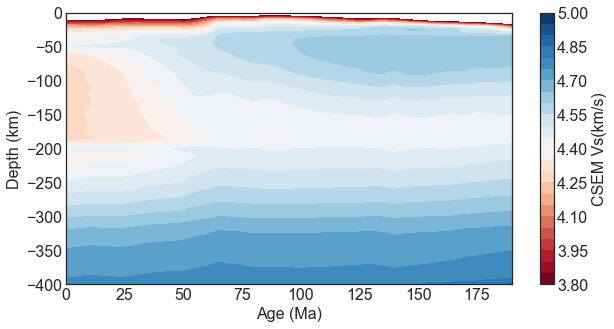

In [6]:
tri = Triangulation(tomo_NA_stack[:,0],-tomo_NA_stack[:, 1])
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True,figsize=(10,5))
m_v_in = ax.tricontourf(tri, tomo_NA_stack[:, 2],cmap='RdBu',levels=np.arange(3.8,5,0.05))
ax.set_ylim([-400,0])
ax.set_xlabel('Age (Ma)')
ax.set_ylabel('Depth (km)')
fig.colorbar(m_v_in, ax=ax, label='CSEM Vs(km/s)', orientation='vertical')

First, we will do the conversion using Gibbs-free energy minimization.

# Loading the library containing functions to do the conversions

Briefly write about the method

In [7]:
import V2RhoT_gibbs_lib as lib

# Loading velcoity and density table from the Gibbs-free energy minimization
First, we will load the pre-computed anharmonic seismic velocties using the Generator subprogram of LitMod2D_2.0 which used Perple_X to do the Gibbs-free-energy minimization. Tables are generated for a give bulk-rock composition in terms of 5 major oxides (NCFMAS system) that account for ~99% composition of the mantle. The precomputed "look-up tables" are generated using the augmented‐modified version of Holland and Powell (1998) thermodynamic database (Afonso & Zlotnik, 2011). The choice of this thermodynamic is based on Kumar et al., 2020. 

Available pre-computed tables in the databases_gibbs where first name indicates composition (see table composition) and second indicates thermodynamic database used (see table Thermodynamic database key).

### Compositions
| Composition |                                   SiO2   | Al2O3   | Feo   | MgO   | CaO   | Na2O   | Mg#   |
|-------------|                                   --------|---------|-------|-------|-------|-------|-------|
|   Primitive Upper mantle (PUM)                  | 45.0   |4.5      |8.1    |37.8   |3.6    |0.36   |89.3|
|   Depleted Mid-oceanic-ridge-basalt (DMM)       | 44.7   |3.98     |8.18    |38.73   |3.17    |0.13   |89.4|
|   Pyrolite                                      | 45.1   |4.6      |7.6    |38.1   |3.1    |0.4   |89.9|
|   Average Garnet Tecton (Tc_1)                  | 44.5   |3.5      |8.0    |39.8   |3.1    |0.24   |89.8|


### Thermodynamic database key:

| Table name    | Description |
|---------------|-------------|
|   _HP      |Augmented‐modified version of Holland & Powell (1998) thermodynamic database (Afonso & Zlotnik, 2011)      |
|   _3       |Stixrude 2008 (EPSL)| 
|            |             |
|            |             |

@ajay6763: Add more pre-computed tables

In [8]:
DMM_no_atten = np.loadtxt('./databases/DMM_HP',comments='#')

# Correction for anelasticity and melts
Velocities computed from Perple_X are anharmonic and in order compare them with the velocities modelled in tomography we need to correct for anelasticity and melts and both of these decreases the seimic velocity.

In [9]:

# correction using grain size = 10 mm and oscillatio period of 75 seconds.
# Attenuation model of Jackson and Faul 2010
# Function: lib.atten_correction (T (oC),P (Pascal),VP (km/s),Vs (km/s),oscilation period (s), grain size (mm))
DMM_atten_corrected = np.copy(DMM_no_atten)
for i in range(len(DMM_atten_corrected)):
    DMM_atten_corrected[i,3],DMM_atten_corrected[i,4] = lib.atten_correction(DMM_atten_corrected[i,0],DMM_atten_corrected[i,1]*100000,
                                                         DMM_atten_corrected[i,3],DMM_atten_corrected[i,4],75,10)

# correction for melts
# These are relations from lab experiments. More details in Afonso et al., 2016 III
# Function: lib.velocity_melt_correction_mantle (T (oC),P (GPa),VP (km/s),Vs (km/s),oscilation period (s), grain size (mm))
DMM_atten_melt_corrected = np.copy(DMM_atten_corrected)
melt = np.zeros_like(DMM_atten_melt_corrected[:,0])
for i in range(len(DMM_atten_melt_corrected)):
    DMM_atten_melt_corrected[i,3],DMM_atten_melt_corrected[i,4],melt[i] = lib.velocity_melt_correction_mantle(DMM_atten_melt_corrected[i,0]-273.15,
                                                                                             DMM_atten_melt_corrected[i,1]/10000,
                                                             DMM_atten_melt_corrected[i,3],DMM_atten_melt_corrected[i,4])

# Now doing the conversion

In [14]:
# The out in sequence is -depth(km), Pressure (bar), Temperature(oC), Density(kg/m3), V_obs-V_model
out_gibbs=lib.vel_to_temp(tomo_NA_stack[:,1],tomo_NA_stack[:,2],DMM_atten_melt_corrected)

################################################
# Saving
################################################
out_save=np.zeros_like(tomo_NA_stack[:,1])
out_save=tomo_NA_stack[:,0]
out_save=np.column_stack((out_save,out_gibbs[:,0]))
out_save=np.column_stack((out_save,out_gibbs[:,1]))
out_save=np.column_stack((out_save,out_gibbs[:,2]))
out_save=np.column_stack((out_save,out_gibbs[:,3]))
out_save=np.column_stack((out_save,out_gibbs[:,4]))
np.savetxt('NA_Age_vel_converted_ak135.txt',out_save,header="#Age(Myr) depth(km) Pressure(bar) Temperature(oC) Density(kg/m3) Vs_diff(km/s)",comments='',fmt='%10.3f')

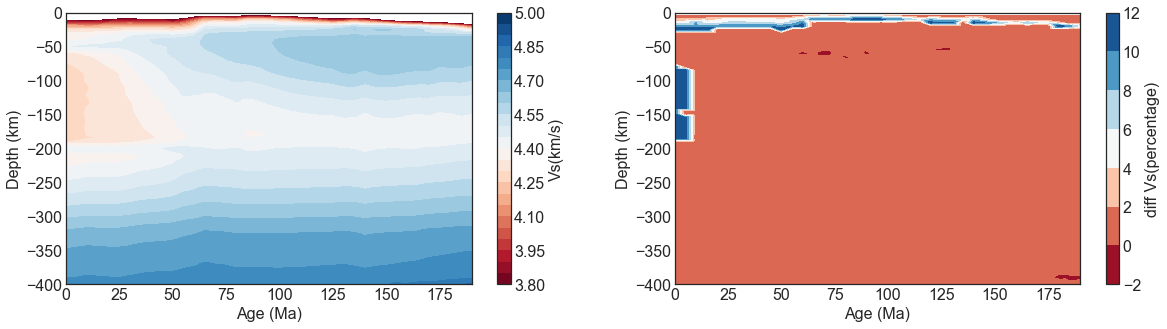

In [15]:
tri = Triangulation(tomo_NA_stack[:,0],-tomo_NA_stack[:, 1])
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False,figsize=(20,5))
m_v_in = ax[0].tricontourf(tri, tomo_NA_stack[:, 2],cmap='RdBu',levels=np.arange(3.8,5,0.05))
m_v_diff = ax[1].tricontourf(tri, (out_gibbs[:,4]/tomo_NA_stack[:, 2])*100,cmap='RdBu')

ax[0].set_ylim([-400,0])
ax[0].set_xlabel('Age (Ma)')
ax[0].set_ylabel('Depth (km)')
fig.colorbar(m_v_in, ax=ax[0], label='Vs(km/s)', orientation='vertical')

ax[1].set_ylim([-400,0])
ax[1].set_xlabel('Age (Ma)')
ax[1].set_ylabel('Depth (km)')
fig.colorbar(m_v_diff, ax=ax[1], label='diff Vs(percentage)', orientation='vertical')

In [16]:
# The out in sequence is -depth(km), Pressure (bar), Temperature(oC), Density(kg/m3), V_obs-V_model
out_gibbs=lib.vel_to_temp_P_in(tomo_NA_stack[:,1],tomo_NA_stack[:,2],DMM_atten_melt_corrected,pressure_litmod)

################################################
# Saving
################################################
out_save=np.zeros_like(tomo_NA_stack[:,1])
out_save=tomo_NA_stack[:,0]
out_save=np.column_stack((out_save,out_gibbs[:,0]))
out_save=np.column_stack((out_save,out_gibbs[:,1]))
out_save=np.column_stack((out_save,out_gibbs[:,2]))
out_save=np.column_stack((out_save,out_gibbs[:,3]))
out_save=np.column_stack((out_save,out_gibbs[:,4]))
np.savetxt('NA_Age_vel_converted_litmod.txt',out_save,header="#Age(Myr) depth(km) Pressure(bar) Temperature(oC) Density(kg/m3) Vs_diff(km/s)",comments='',fmt='%10.3f')

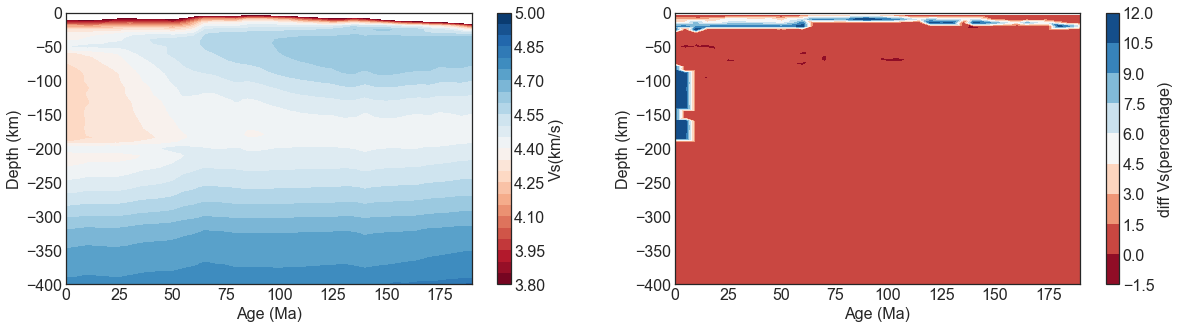

In [17]:
tri = Triangulation(tomo_NA_stack[:,0],-tomo_NA_stack[:, 1])
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False,figsize=(20,5))
m_v_in = ax[0].tricontourf(tri, tomo_NA_stack[:, 2],cmap='RdBu',levels=np.arange(3.8,5,0.05))
m_v_diff = ax[1].tricontourf(tri, (out_gibbs[:,4]/tomo_NA_stack[:, 2])*100,cmap='RdBu')

ax[0].set_ylim([-400,0])
ax[0].set_xlabel('Age (Ma)')
ax[0].set_ylabel('Depth (km)')
fig.colorbar(m_v_in, ax=ax[0], label='Vs(km/s)', orientation='vertical')

ax[1].set_ylim([-400,0])
ax[1].set_xlabel('Age (Ma)')
ax[1].set_ylabel('Depth (km)')
fig.colorbar(m_v_diff, ax=ax[1], label='diff Vs(percentage)', orientation='vertical')

In [25]:
# The out in sequence is -depth(km), Pressure (bar), Temperature(oC), Density(kg/m3), V_obs-V_model
out_gibbs=lib.vel_to_temp_P_in(tomo_NA_stack[:,1],tomo_NA_stack[:,2],DMM_atten_melt_corrected,pressure_ak135_lith)

################################################
# Saving
################################################
out_save=np.zeros_like(tomo_NA_stack[:,1])
out_save=tomo_NA_stack[:,0]
out_save=np.column_stack((out_save,out_gibbs[:,0]))
out_save=np.column_stack((out_save,out_gibbs[:,1]))
out_save=np.column_stack((out_save,out_gibbs[:,2]))
out_save=np.column_stack((out_save,out_gibbs[:,3]))
out_save=np.column_stack((out_save,out_gibbs[:,4]))
np.savetxt('NA_Age_vel_converted_ak135_lith.txt',out_save,header="#Age(Myr) depth(km) Pressure(bar) Temperature(oC) Density(kg/m3) Vs_diff(km/s)",comments='',fmt='%10.3f')

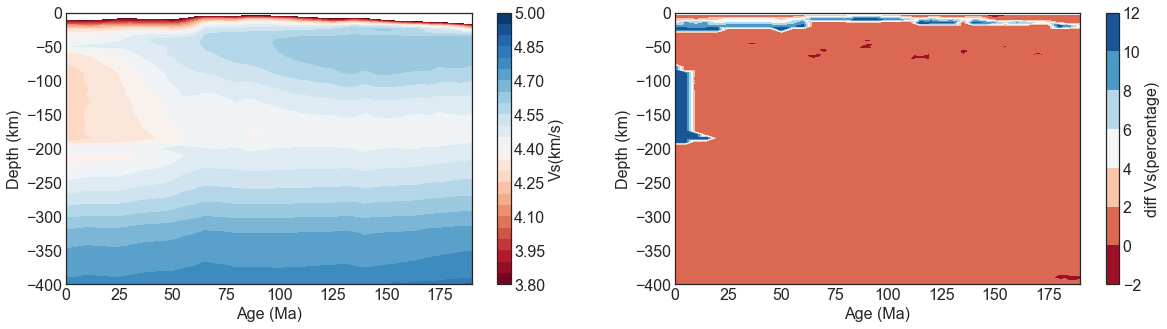

In [26]:
tri = Triangulation(tomo_NA_stack[:,0],-tomo_NA_stack[:, 1])
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False,figsize=(20,5))
m_v_in = ax[0].tricontourf(tri, tomo_NA_stack[:, 2],cmap='RdBu',levels=np.arange(3.8,5,0.05))
m_v_diff = ax[1].tricontourf(tri, (out_gibbs[:,4]/tomo_NA_stack[:, 2])*100,cmap='RdBu')

ax[0].set_ylim([-400,0])
ax[0].set_xlabel('Age (Ma)')
ax[0].set_ylabel('Depth (km)')
fig.colorbar(m_v_in, ax=ax[0], label='Vs(km/s)', orientation='vertical')

ax[1].set_ylim([-400,0])
ax[1].set_xlabel('Age (Ma)')
ax[1].set_ylabel('Depth (km)')
fig.colorbar(m_v_diff, ax=ax[1], label='diff Vs(percentage)', orientation='vertical')